# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 3.0MB/s eta 0:00:01   35% |███████████▎                    | 5.1MB 33.3MB/s eta 0:00:01
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

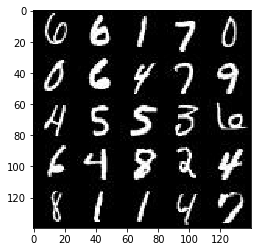

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

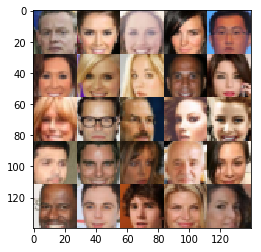

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=(None,image_width, image_height,image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, shape = (None,z_dim), name = 'input_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start\n    handler_func(fd_obj, events)', 'File "/opt/conda/lib/

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # input 28x28x3
        x1 = tf.layers.conv2d(images, 56, 5, strides=2, padding='same')
        relu1 = tf.maximum(x1*0.2, x1)
        
        x2 = tf.layers.conv2d(relu1, 112,5,strides=2, padding = 'same')
        bm2 = tf.layers.batch_normalization(x2,training=True)
        relu2=tf.maximum(bm2*0.2,bm2)
        #7x7x112
        
        flat = tf.reshape(relu2, (-1, 7*7*112))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        # 8x8x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=2, padding='same')
        logits2 = tf.image.resize_images(logits, (28,28))
        # 32x32x3 now
        
        out = tf.tanh(logits2)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    genm = generator(input_z, out_channel_dim)
    dism_real, disl_real = discriminator(input_real, reuse = False)
    dism_fake, disl_fake = discriminator(genm, reuse=True)

    dis_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disl_real, labels=tf.ones_like(dism_real)))
    dis_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disl_fake, labels=tf.zeros_like(dism_fake)))
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disl_fake, labels=tf.ones_like(dism_fake)))

    dis_loss = dis_loss_real + dis_loss_fake
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    dis_vars = []
    gen_vars = []
    for i in train_vars:
        if i.name.startswith('generator'):
            gen_vars.append(i)
        if i.name.startswith('discriminator'):
            dis_vars.append(i)
    
    gen_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    dis_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
    
    return dis_opt, gen_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps=0
    print_every=10
    show_every=100
    sample, loss = [], []
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, data_shape[3])
    dis_opt, gen_opt = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps+=1
                batch_images*=2
                # TODO: Train Model
                batch_z = np.random.uniform(-1,1, size=(batch_size, z_dim))
                
                _= sess.run(dis_opt, feed_dict = {input_real : batch_images, input_z : batch_z, learn_rate:learning_rate})
                _= sess.run(gen_opt, feed_dict = {input_z : batch_z, learn_rate:learning_rate})
                
                if steps % print_every ==0:
                    train_loss_dis = dis_loss.eval({input_z:batch_z, input_real:batch_images})
                    train_loss_gen = gen_loss.eval({input_z:batch_z})
                    
                    print('Epoch {}/{}...'.format(epoch_i+1,epochs),
                         'Discriminator Loss: {:.4f}'.format(train_loss_dis),
                         'Generator Loss: {:.4f}'.format(train_loss_gen))
                    loss.append((train_loss_dis,train_loss_gen))
                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
            print('End of Epoch...')
            show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                
    return loss, sample

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.7234 Generator Loss: 0.0344
Epoch 1/2... Discriminator Loss: 0.7859 Generator Loss: 0.9375
Epoch 1/2... Discriminator Loss: 1.7999 Generator Loss: 0.2898
Epoch 1/2... Discriminator Loss: 1.0085 Generator Loss: 0.8046
Epoch 1/2... Discriminator Loss: 2.2357 Generator Loss: 0.3630
Epoch 1/2... Discriminator Loss: 2.2483 Generator Loss: 0.3457
Epoch 1/2... Discriminator Loss: 1.4954 Generator Loss: 0.6332
Epoch 1/2... Discriminator Loss: 1.8276 Generator Loss: 0.4432
Epoch 1/2... Discriminator Loss: 1.1417 Generator Loss: 0.8650
Epoch 1/2... Discriminator Loss: 1.3320 Generator Loss: 0.7227


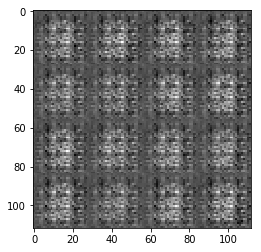

Epoch 1/2... Discriminator Loss: 1.1311 Generator Loss: 0.8494
Epoch 1/2... Discriminator Loss: 1.4940 Generator Loss: 0.7014
Epoch 1/2... Discriminator Loss: 1.3730 Generator Loss: 0.6887
Epoch 1/2... Discriminator Loss: 1.0333 Generator Loss: 0.9830
Epoch 1/2... Discriminator Loss: 1.1706 Generator Loss: 0.8123
Epoch 1/2... Discriminator Loss: 0.9183 Generator Loss: 0.9399
Epoch 1/2... Discriminator Loss: 1.0947 Generator Loss: 0.8689
Epoch 1/2... Discriminator Loss: 1.1883 Generator Loss: 0.7992
Epoch 1/2... Discriminator Loss: 1.3624 Generator Loss: 0.6050
Epoch 1/2... Discriminator Loss: 1.2184 Generator Loss: 0.6857


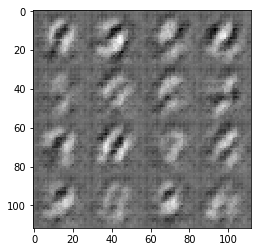

Epoch 1/2... Discriminator Loss: 1.4961 Generator Loss: 0.6864
Epoch 1/2... Discriminator Loss: 1.4528 Generator Loss: 0.5837
Epoch 1/2... Discriminator Loss: 1.4022 Generator Loss: 0.6008
Epoch 1/2... Discriminator Loss: 1.3516 Generator Loss: 0.7174
Epoch 1/2... Discriminator Loss: 1.3158 Generator Loss: 0.5936
Epoch 1/2... Discriminator Loss: 1.5105 Generator Loss: 0.5785
Epoch 1/2... Discriminator Loss: 1.5240 Generator Loss: 0.7012
Epoch 1/2... Discriminator Loss: 1.4162 Generator Loss: 0.8480
Epoch 1/2... Discriminator Loss: 1.3621 Generator Loss: 0.7054
Epoch 1/2... Discriminator Loss: 1.4293 Generator Loss: 0.8368


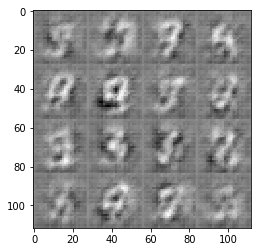

Epoch 1/2... Discriminator Loss: 1.4101 Generator Loss: 0.7000
Epoch 1/2... Discriminator Loss: 1.3886 Generator Loss: 0.7483
Epoch 1/2... Discriminator Loss: 1.4491 Generator Loss: 0.7355
Epoch 1/2... Discriminator Loss: 1.4265 Generator Loss: 0.7028
Epoch 1/2... Discriminator Loss: 1.3653 Generator Loss: 0.7686
Epoch 1/2... Discriminator Loss: 1.3099 Generator Loss: 0.8290
Epoch 1/2... Discriminator Loss: 1.4057 Generator Loss: 0.5601
Epoch 1/2... Discriminator Loss: 1.3825 Generator Loss: 0.6050
Epoch 1/2... Discriminator Loss: 1.3384 Generator Loss: 0.7820
Epoch 1/2... Discriminator Loss: 1.3478 Generator Loss: 0.8961


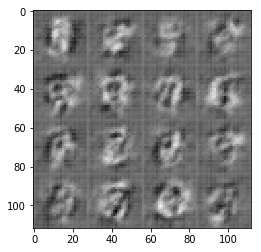

Epoch 1/2... Discriminator Loss: 1.3340 Generator Loss: 0.5408
Epoch 1/2... Discriminator Loss: 1.3389 Generator Loss: 0.6454
Epoch 1/2... Discriminator Loss: 1.4771 Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 1.3943 Generator Loss: 0.6918
Epoch 1/2... Discriminator Loss: 1.1625 Generator Loss: 0.7962
Epoch 1/2... Discriminator Loss: 1.2846 Generator Loss: 0.6485
Epoch 1/2... Discriminator Loss: 1.4092 Generator Loss: 0.4379
Epoch 1/2... Discriminator Loss: 1.3565 Generator Loss: 0.6581
Epoch 1/2... Discriminator Loss: 1.3417 Generator Loss: 0.7179
Epoch 1/2... Discriminator Loss: 1.3596 Generator Loss: 0.5687


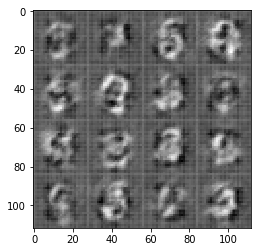

Epoch 1/2... Discriminator Loss: 1.3074 Generator Loss: 0.5140
Epoch 1/2... Discriminator Loss: 1.2789 Generator Loss: 0.6428
Epoch 1/2... Discriminator Loss: 1.4158 Generator Loss: 0.4615
Epoch 1/2... Discriminator Loss: 1.1941 Generator Loss: 0.6226
Epoch 1/2... Discriminator Loss: 1.2649 Generator Loss: 0.5852
Epoch 1/2... Discriminator Loss: 1.2899 Generator Loss: 0.6949
Epoch 1/2... Discriminator Loss: 1.2871 Generator Loss: 0.8076
Epoch 1/2... Discriminator Loss: 1.2719 Generator Loss: 0.9819
Epoch 1/2... Discriminator Loss: 1.1587 Generator Loss: 0.6944
Epoch 1/2... Discriminator Loss: 1.2385 Generator Loss: 0.8648


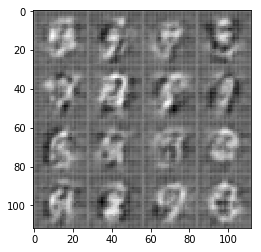

Epoch 1/2... Discriminator Loss: 1.2939 Generator Loss: 0.4898
Epoch 1/2... Discriminator Loss: 1.2999 Generator Loss: 0.5051
Epoch 1/2... Discriminator Loss: 1.1723 Generator Loss: 0.7786
Epoch 1/2... Discriminator Loss: 1.1823 Generator Loss: 0.5803
Epoch 1/2... Discriminator Loss: 1.1416 Generator Loss: 0.6986
Epoch 1/2... Discriminator Loss: 1.1857 Generator Loss: 0.6950
Epoch 1/2... Discriminator Loss: 1.1791 Generator Loss: 0.7398
Epoch 1/2... Discriminator Loss: 1.2265 Generator Loss: 1.0651
Epoch 1/2... Discriminator Loss: 1.2165 Generator Loss: 0.8393
Epoch 1/2... Discriminator Loss: 1.2858 Generator Loss: 0.7799


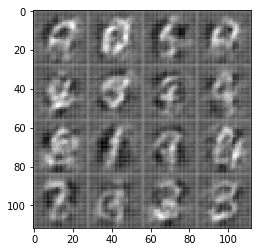

Epoch 1/2... Discriminator Loss: 1.2516 Generator Loss: 0.6502
Epoch 1/2... Discriminator Loss: 1.2068 Generator Loss: 0.8445
Epoch 1/2... Discriminator Loss: 1.2606 Generator Loss: 1.0196
Epoch 1/2... Discriminator Loss: 1.3219 Generator Loss: 0.4718
Epoch 1/2... Discriminator Loss: 1.3803 Generator Loss: 0.6530
Epoch 1/2... Discriminator Loss: 1.3126 Generator Loss: 0.5004
Epoch 1/2... Discriminator Loss: 1.2997 Generator Loss: 0.6740
Epoch 1/2... Discriminator Loss: 1.1960 Generator Loss: 0.9899
Epoch 1/2... Discriminator Loss: 1.3234 Generator Loss: 0.6861
Epoch 1/2... Discriminator Loss: 1.2196 Generator Loss: 0.8328


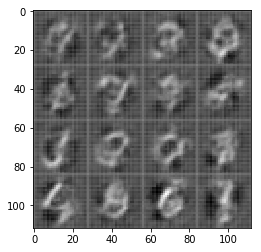

Epoch 1/2... Discriminator Loss: 1.3672 Generator Loss: 0.8714
Epoch 1/2... Discriminator Loss: 1.3469 Generator Loss: 0.4960
Epoch 1/2... Discriminator Loss: 1.2828 Generator Loss: 0.6036
Epoch 1/2... Discriminator Loss: 1.3862 Generator Loss: 0.5209
Epoch 1/2... Discriminator Loss: 1.3137 Generator Loss: 0.8876
Epoch 1/2... Discriminator Loss: 1.3645 Generator Loss: 0.8234
Epoch 1/2... Discriminator Loss: 1.3804 Generator Loss: 0.4347
Epoch 1/2... Discriminator Loss: 1.3717 Generator Loss: 0.5640
Epoch 1/2... Discriminator Loss: 1.2658 Generator Loss: 0.8607
Epoch 1/2... Discriminator Loss: 1.3297 Generator Loss: 0.8351


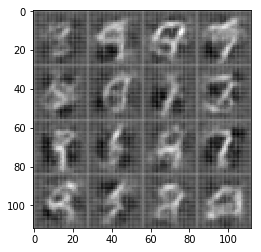

Epoch 1/2... Discriminator Loss: 1.3868 Generator Loss: 0.4967
Epoch 1/2... Discriminator Loss: 1.3266 Generator Loss: 0.7765
Epoch 1/2... Discriminator Loss: 1.3600 Generator Loss: 0.5194
Epoch 1/2... Discriminator Loss: 1.2895 Generator Loss: 0.6183
Epoch 1/2... Discriminator Loss: 1.3658 Generator Loss: 0.7458
Epoch 1/2... Discriminator Loss: 1.2684 Generator Loss: 0.8149
Epoch 1/2... Discriminator Loss: 1.2474 Generator Loss: 0.9326
Epoch 1/2... Discriminator Loss: 1.3028 Generator Loss: 0.8499
Epoch 1/2... Discriminator Loss: 1.4370 Generator Loss: 0.7503
Epoch 1/2... Discriminator Loss: 1.3941 Generator Loss: 0.5638


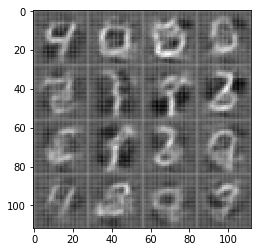

Epoch 1/2... Discriminator Loss: 1.2889 Generator Loss: 0.7007
Epoch 1/2... Discriminator Loss: 1.3474 Generator Loss: 0.9284
Epoch 1/2... Discriminator Loss: 1.3459 Generator Loss: 0.8256
Epoch 1/2... Discriminator Loss: 1.4225 Generator Loss: 0.6056
Epoch 1/2... Discriminator Loss: 1.3485 Generator Loss: 0.6686
Epoch 1/2... Discriminator Loss: 1.4097 Generator Loss: 0.5206
Epoch 1/2... Discriminator Loss: 1.3805 Generator Loss: 0.9988
Epoch 1/2... Discriminator Loss: 1.4051 Generator Loss: 0.4893
Epoch 1/2... Discriminator Loss: 1.2679 Generator Loss: 0.8493
Epoch 1/2... Discriminator Loss: 1.3635 Generator Loss: 0.7158


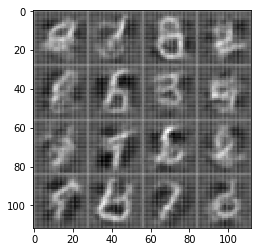

Epoch 1/2... Discriminator Loss: 1.3458 Generator Loss: 0.6401
Epoch 1/2... Discriminator Loss: 1.3387 Generator Loss: 0.8717
Epoch 1/2... Discriminator Loss: 1.2152 Generator Loss: 0.6061
Epoch 1/2... Discriminator Loss: 1.4511 Generator Loss: 0.4189
Epoch 1/2... Discriminator Loss: 1.4102 Generator Loss: 0.6644
Epoch 1/2... Discriminator Loss: 1.4459 Generator Loss: 0.7071
Epoch 1/2... Discriminator Loss: 1.3043 Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.3073 Generator Loss: 0.5771
Epoch 1/2... Discriminator Loss: 1.3361 Generator Loss: 0.5589
Epoch 1/2... Discriminator Loss: 1.2919 Generator Loss: 0.6509


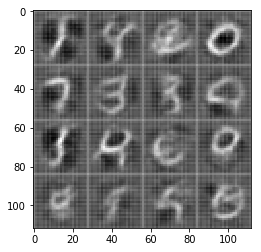

Epoch 1/2... Discriminator Loss: 1.2850 Generator Loss: 0.6922
Epoch 1/2... Discriminator Loss: 1.3412 Generator Loss: 0.8249
Epoch 1/2... Discriminator Loss: 1.3663 Generator Loss: 0.5154
Epoch 1/2... Discriminator Loss: 1.3491 Generator Loss: 0.6539
Epoch 1/2... Discriminator Loss: 1.2950 Generator Loss: 0.7537
Epoch 1/2... Discriminator Loss: 1.4074 Generator Loss: 0.5431
Epoch 1/2... Discriminator Loss: 1.3680 Generator Loss: 0.6581
Epoch 1/2... Discriminator Loss: 1.3894 Generator Loss: 0.8628
Epoch 1/2... Discriminator Loss: 1.3159 Generator Loss: 0.6214
Epoch 1/2... Discriminator Loss: 1.2593 Generator Loss: 0.8287


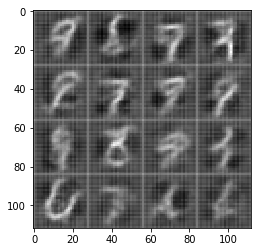

Epoch 1/2... Discriminator Loss: 1.3526 Generator Loss: 0.7288
Epoch 1/2... Discriminator Loss: 1.2687 Generator Loss: 0.5701
Epoch 1/2... Discriminator Loss: 1.2677 Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 1.3781 Generator Loss: 0.8423
Epoch 1/2... Discriminator Loss: 1.2804 Generator Loss: 0.6718
Epoch 1/2... Discriminator Loss: 1.3457 Generator Loss: 0.9449
Epoch 1/2... Discriminator Loss: 1.2626 Generator Loss: 0.9843
Epoch 1/2... Discriminator Loss: 1.4352 Generator Loss: 0.5662
Epoch 1/2... Discriminator Loss: 1.4467 Generator Loss: 0.4039
Epoch 1/2... Discriminator Loss: 1.2658 Generator Loss: 0.7480


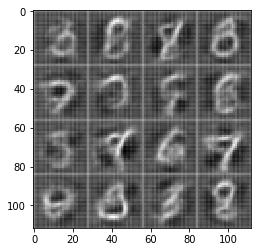

Epoch 1/2... Discriminator Loss: 1.3311 Generator Loss: 0.8171
Epoch 1/2... Discriminator Loss: 1.4060 Generator Loss: 0.7484
Epoch 1/2... Discriminator Loss: 1.3232 Generator Loss: 0.6562
Epoch 1/2... Discriminator Loss: 1.2692 Generator Loss: 0.7569
Epoch 1/2... Discriminator Loss: 1.3435 Generator Loss: 0.9882
Epoch 1/2... Discriminator Loss: 1.4432 Generator Loss: 0.5149
Epoch 1/2... Discriminator Loss: 1.3229 Generator Loss: 0.7195
Epoch 1/2... Discriminator Loss: 1.3184 Generator Loss: 0.5111
Epoch 1/2... Discriminator Loss: 1.4364 Generator Loss: 1.0468
Epoch 1/2... Discriminator Loss: 1.3047 Generator Loss: 0.8393


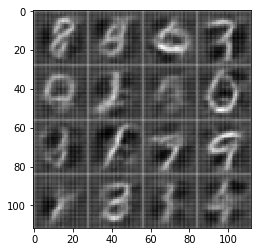

Epoch 1/2... Discriminator Loss: 1.3281 Generator Loss: 0.6357
Epoch 1/2... Discriminator Loss: 1.2055 Generator Loss: 0.7240
Epoch 1/2... Discriminator Loss: 1.3189 Generator Loss: 0.7785
Epoch 1/2... Discriminator Loss: 1.3106 Generator Loss: 0.6761
Epoch 1/2... Discriminator Loss: 1.2214 Generator Loss: 0.6263
Epoch 1/2... Discriminator Loss: 1.2637 Generator Loss: 0.6000
Epoch 1/2... Discriminator Loss: 1.3509 Generator Loss: 0.5056
Epoch 1/2... Discriminator Loss: 1.2241 Generator Loss: 0.6622
Epoch 1/2... Discriminator Loss: 1.1993 Generator Loss: 0.8968
Epoch 1/2... Discriminator Loss: 1.3425 Generator Loss: 0.6332


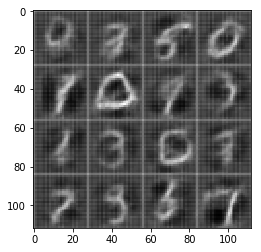

Epoch 1/2... Discriminator Loss: 1.3183 Generator Loss: 0.5978
Epoch 1/2... Discriminator Loss: 1.3416 Generator Loss: 0.6628
Epoch 1/2... Discriminator Loss: 1.3577 Generator Loss: 0.7477
Epoch 1/2... Discriminator Loss: 1.2338 Generator Loss: 0.7031
Epoch 1/2... Discriminator Loss: 1.2876 Generator Loss: 0.5431
Epoch 1/2... Discriminator Loss: 1.3578 Generator Loss: 0.4514
Epoch 1/2... Discriminator Loss: 1.2571 Generator Loss: 0.7208
Epoch 1/2... Discriminator Loss: 1.3018 Generator Loss: 0.8107
Epoch 1/2... Discriminator Loss: 1.3097 Generator Loss: 0.4793
Epoch 1/2... Discriminator Loss: 1.2819 Generator Loss: 0.7218


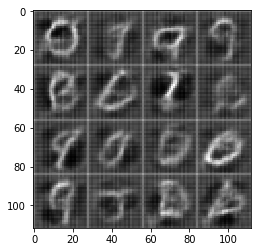

Epoch 1/2... Discriminator Loss: 1.3662 Generator Loss: 0.5810
Epoch 1/2... Discriminator Loss: 1.3309 Generator Loss: 0.5497
Epoch 1/2... Discriminator Loss: 1.2021 Generator Loss: 0.7633
Epoch 1/2... Discriminator Loss: 1.2075 Generator Loss: 0.7382
Epoch 1/2... Discriminator Loss: 1.2151 Generator Loss: 0.7130
Epoch 1/2... Discriminator Loss: 1.0664 Generator Loss: 1.1390
Epoch 1/2... Discriminator Loss: 1.2711 Generator Loss: 0.6346
Epoch 1/2... Discriminator Loss: 1.2262 Generator Loss: 0.6097
Epoch 1/2... Discriminator Loss: 1.2412 Generator Loss: 0.8170
Epoch 1/2... Discriminator Loss: 1.2944 Generator Loss: 0.6252


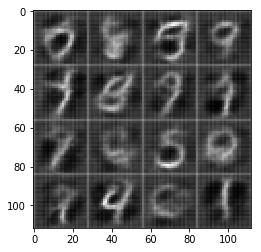

Epoch 1/2... Discriminator Loss: 1.2845 Generator Loss: 0.4992
Epoch 1/2... Discriminator Loss: 1.1834 Generator Loss: 1.0736
Epoch 1/2... Discriminator Loss: 1.2385 Generator Loss: 1.0367
Epoch 1/2... Discriminator Loss: 1.2093 Generator Loss: 0.7056
Epoch 1/2... Discriminator Loss: 1.3472 Generator Loss: 0.6975
Epoch 1/2... Discriminator Loss: 1.2758 Generator Loss: 0.7003
Epoch 1/2... Discriminator Loss: 1.3811 Generator Loss: 0.4560
End of Epoch...


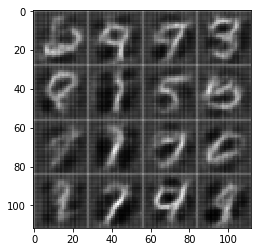

Epoch 2/2... Discriminator Loss: 1.3434 Generator Loss: 1.1720
Epoch 2/2... Discriminator Loss: 1.3120 Generator Loss: 0.5296
Epoch 2/2... Discriminator Loss: 1.3833 Generator Loss: 0.4803


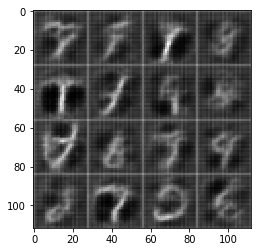

Epoch 2/2... Discriminator Loss: 1.2282 Generator Loss: 0.7178
Epoch 2/2... Discriminator Loss: 1.3597 Generator Loss: 0.4631
Epoch 2/2... Discriminator Loss: 1.3835 Generator Loss: 0.4393
Epoch 2/2... Discriminator Loss: 1.1325 Generator Loss: 0.9739
Epoch 2/2... Discriminator Loss: 1.1994 Generator Loss: 0.6442
Epoch 2/2... Discriminator Loss: 1.3762 Generator Loss: 0.4111
Epoch 2/2... Discriminator Loss: 1.3044 Generator Loss: 0.7108
Epoch 2/2... Discriminator Loss: 1.1849 Generator Loss: 0.6580
Epoch 2/2... Discriminator Loss: 1.4211 Generator Loss: 0.5467
Epoch 2/2... Discriminator Loss: 1.3636 Generator Loss: 0.9035


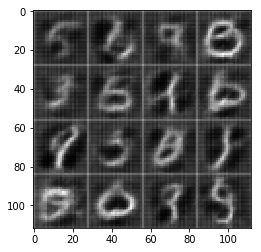

Epoch 2/2... Discriminator Loss: 1.2738 Generator Loss: 0.5370
Epoch 2/2... Discriminator Loss: 1.2577 Generator Loss: 0.8151
Epoch 2/2... Discriminator Loss: 1.3454 Generator Loss: 0.4668
Epoch 2/2... Discriminator Loss: 1.2477 Generator Loss: 0.6011
Epoch 2/2... Discriminator Loss: 1.1709 Generator Loss: 0.9994
Epoch 2/2... Discriminator Loss: 1.2677 Generator Loss: 0.5601
Epoch 2/2... Discriminator Loss: 1.3277 Generator Loss: 0.6873
Epoch 2/2... Discriminator Loss: 1.2505 Generator Loss: 1.0305
Epoch 2/2... Discriminator Loss: 1.2659 Generator Loss: 0.5986
Epoch 2/2... Discriminator Loss: 1.2818 Generator Loss: 0.5954


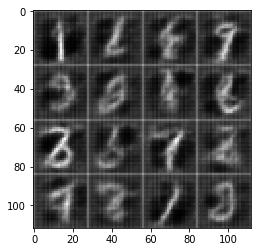

Epoch 2/2... Discriminator Loss: 1.1850 Generator Loss: 0.7340
Epoch 2/2... Discriminator Loss: 1.0663 Generator Loss: 0.9110
Epoch 2/2... Discriminator Loss: 1.1868 Generator Loss: 0.7671
Epoch 2/2... Discriminator Loss: 1.3271 Generator Loss: 0.4262
Epoch 2/2... Discriminator Loss: 1.1957 Generator Loss: 0.5823
Epoch 2/2... Discriminator Loss: 1.1193 Generator Loss: 0.9186
Epoch 2/2... Discriminator Loss: 1.1911 Generator Loss: 0.7761
Epoch 2/2... Discriminator Loss: 1.3250 Generator Loss: 0.6454
Epoch 2/2... Discriminator Loss: 1.3481 Generator Loss: 0.6289
Epoch 2/2... Discriminator Loss: 1.3362 Generator Loss: 0.8925


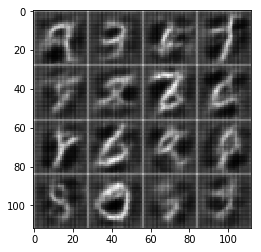

Epoch 2/2... Discriminator Loss: 1.1833 Generator Loss: 0.8618
Epoch 2/2... Discriminator Loss: 1.4741 Generator Loss: 0.3637
Epoch 2/2... Discriminator Loss: 1.1627 Generator Loss: 0.8551
Epoch 2/2... Discriminator Loss: 1.1829 Generator Loss: 0.9184
Epoch 2/2... Discriminator Loss: 1.1697 Generator Loss: 1.0406
Epoch 2/2... Discriminator Loss: 1.1834 Generator Loss: 0.5603
Epoch 2/2... Discriminator Loss: 1.2278 Generator Loss: 0.6808
Epoch 2/2... Discriminator Loss: 1.3128 Generator Loss: 0.5150
Epoch 2/2... Discriminator Loss: 1.1692 Generator Loss: 0.9929
Epoch 2/2... Discriminator Loss: 1.2997 Generator Loss: 0.6295


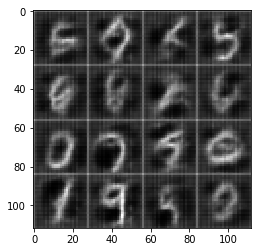

Epoch 2/2... Discriminator Loss: 1.1275 Generator Loss: 0.7955
Epoch 2/2... Discriminator Loss: 1.1726 Generator Loss: 1.1570
Epoch 2/2... Discriminator Loss: 1.3717 Generator Loss: 0.6333
Epoch 2/2... Discriminator Loss: 1.2597 Generator Loss: 0.5774
Epoch 2/2... Discriminator Loss: 1.2120 Generator Loss: 0.8839
Epoch 2/2... Discriminator Loss: 1.1068 Generator Loss: 0.6826
Epoch 2/2... Discriminator Loss: 1.1151 Generator Loss: 0.9864
Epoch 2/2... Discriminator Loss: 1.1988 Generator Loss: 0.7214
Epoch 2/2... Discriminator Loss: 1.2807 Generator Loss: 0.5733
Epoch 2/2... Discriminator Loss: 1.1864 Generator Loss: 0.7215


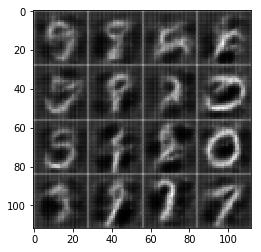

Epoch 2/2... Discriminator Loss: 1.2685 Generator Loss: 0.6743
Epoch 2/2... Discriminator Loss: 1.1288 Generator Loss: 0.7065
Epoch 2/2... Discriminator Loss: 1.1472 Generator Loss: 0.8125
Epoch 2/2... Discriminator Loss: 1.2436 Generator Loss: 0.7702
Epoch 2/2... Discriminator Loss: 1.4463 Generator Loss: 0.3700
Epoch 2/2... Discriminator Loss: 1.2769 Generator Loss: 0.5909
Epoch 2/2... Discriminator Loss: 1.1654 Generator Loss: 0.9183
Epoch 2/2... Discriminator Loss: 1.0911 Generator Loss: 0.8667
Epoch 2/2... Discriminator Loss: 1.1205 Generator Loss: 1.0425
Epoch 2/2... Discriminator Loss: 1.3450 Generator Loss: 0.4716


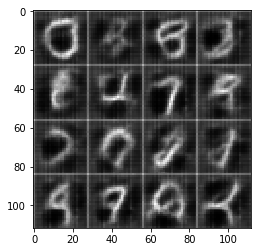

Epoch 2/2... Discriminator Loss: 1.1213 Generator Loss: 0.7527
Epoch 2/2... Discriminator Loss: 1.4164 Generator Loss: 0.4037
Epoch 2/2... Discriminator Loss: 1.1357 Generator Loss: 0.9353
Epoch 2/2... Discriminator Loss: 1.4134 Generator Loss: 0.3786
Epoch 2/2... Discriminator Loss: 1.2806 Generator Loss: 0.8019
Epoch 2/2... Discriminator Loss: 1.1833 Generator Loss: 0.6155
Epoch 2/2... Discriminator Loss: 1.1698 Generator Loss: 0.6501
Epoch 2/2... Discriminator Loss: 1.3243 Generator Loss: 0.5901
Epoch 2/2... Discriminator Loss: 1.0303 Generator Loss: 0.8549
Epoch 2/2... Discriminator Loss: 1.5595 Generator Loss: 0.3260


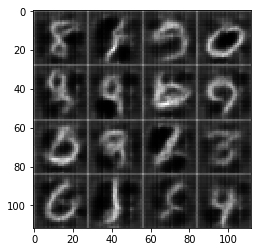

Epoch 2/2... Discriminator Loss: 1.2761 Generator Loss: 0.7818
Epoch 2/2... Discriminator Loss: 1.2726 Generator Loss: 0.5872
Epoch 2/2... Discriminator Loss: 1.2019 Generator Loss: 0.9386
Epoch 2/2... Discriminator Loss: 1.3307 Generator Loss: 1.2106
Epoch 2/2... Discriminator Loss: 1.1421 Generator Loss: 0.7014
Epoch 2/2... Discriminator Loss: 1.3369 Generator Loss: 0.5911
Epoch 2/2... Discriminator Loss: 1.2395 Generator Loss: 0.6081
Epoch 2/2... Discriminator Loss: 1.3814 Generator Loss: 0.4126
Epoch 2/2... Discriminator Loss: 1.1120 Generator Loss: 0.7154
Epoch 2/2... Discriminator Loss: 1.1569 Generator Loss: 1.1595


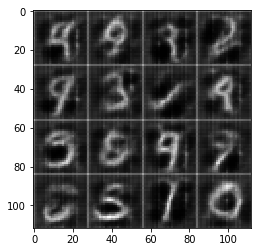

Epoch 2/2... Discriminator Loss: 1.2623 Generator Loss: 1.3320
Epoch 2/2... Discriminator Loss: 1.0786 Generator Loss: 1.2449
Epoch 2/2... Discriminator Loss: 1.3300 Generator Loss: 0.4775
Epoch 2/2... Discriminator Loss: 1.3562 Generator Loss: 1.2749
Epoch 2/2... Discriminator Loss: 1.2016 Generator Loss: 0.6933
Epoch 2/2... Discriminator Loss: 1.2227 Generator Loss: 0.7101
Epoch 2/2... Discriminator Loss: 1.3517 Generator Loss: 0.4410
Epoch 2/2... Discriminator Loss: 1.2906 Generator Loss: 0.5120
Epoch 2/2... Discriminator Loss: 1.2581 Generator Loss: 0.8456
Epoch 2/2... Discriminator Loss: 1.1937 Generator Loss: 0.8831


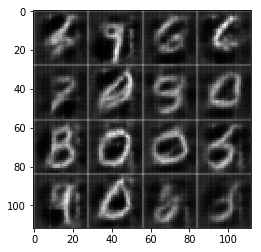

Epoch 2/2... Discriminator Loss: 1.5910 Generator Loss: 0.2906
Epoch 2/2... Discriminator Loss: 1.2798 Generator Loss: 0.8399
Epoch 2/2... Discriminator Loss: 1.3246 Generator Loss: 0.4604
Epoch 2/2... Discriminator Loss: 1.1154 Generator Loss: 0.6862
Epoch 2/2... Discriminator Loss: 1.2722 Generator Loss: 0.6777
Epoch 2/2... Discriminator Loss: 1.2312 Generator Loss: 0.6278
Epoch 2/2... Discriminator Loss: 1.3685 Generator Loss: 1.4278
Epoch 2/2... Discriminator Loss: 1.3091 Generator Loss: 0.6762
Epoch 2/2... Discriminator Loss: 1.2019 Generator Loss: 0.8761
Epoch 2/2... Discriminator Loss: 1.4663 Generator Loss: 0.3923


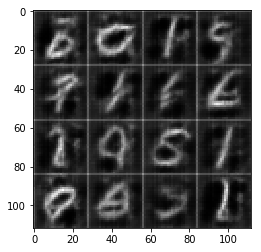

Epoch 2/2... Discriminator Loss: 1.1167 Generator Loss: 0.8858
Epoch 2/2... Discriminator Loss: 1.1617 Generator Loss: 0.7454
Epoch 2/2... Discriminator Loss: 1.3023 Generator Loss: 0.7992
Epoch 2/2... Discriminator Loss: 1.1492 Generator Loss: 1.0727
Epoch 2/2... Discriminator Loss: 1.3024 Generator Loss: 0.7545
Epoch 2/2... Discriminator Loss: 1.1435 Generator Loss: 0.8322
Epoch 2/2... Discriminator Loss: 1.2060 Generator Loss: 0.7224
Epoch 2/2... Discriminator Loss: 1.2679 Generator Loss: 0.4770
Epoch 2/2... Discriminator Loss: 1.3020 Generator Loss: 0.7155
Epoch 2/2... Discriminator Loss: 1.2473 Generator Loss: 0.5209


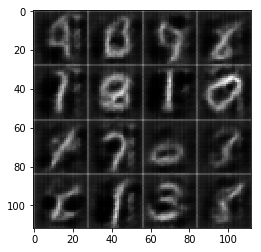

Epoch 2/2... Discriminator Loss: 1.2657 Generator Loss: 0.5912
Epoch 2/2... Discriminator Loss: 1.1722 Generator Loss: 0.6971
Epoch 2/2... Discriminator Loss: 1.2422 Generator Loss: 0.8717
Epoch 2/2... Discriminator Loss: 1.2853 Generator Loss: 0.6027
Epoch 2/2... Discriminator Loss: 1.3160 Generator Loss: 0.7306
Epoch 2/2... Discriminator Loss: 1.2766 Generator Loss: 0.7296
Epoch 2/2... Discriminator Loss: 1.1257 Generator Loss: 0.9392
Epoch 2/2... Discriminator Loss: 1.0894 Generator Loss: 0.9514
Epoch 2/2... Discriminator Loss: 1.1646 Generator Loss: 0.8808
Epoch 2/2... Discriminator Loss: 1.1915 Generator Loss: 0.8190


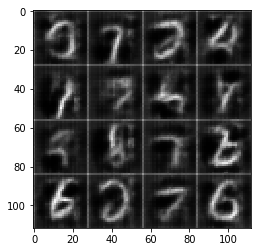

Epoch 2/2... Discriminator Loss: 1.2321 Generator Loss: 0.9180
Epoch 2/2... Discriminator Loss: 1.2112 Generator Loss: 1.1140
Epoch 2/2... Discriminator Loss: 1.3000 Generator Loss: 0.6776
Epoch 2/2... Discriminator Loss: 1.3003 Generator Loss: 0.5738
Epoch 2/2... Discriminator Loss: 1.3169 Generator Loss: 0.5905
Epoch 2/2... Discriminator Loss: 1.3097 Generator Loss: 0.5726
Epoch 2/2... Discriminator Loss: 1.3781 Generator Loss: 0.8488
Epoch 2/2... Discriminator Loss: 1.1755 Generator Loss: 0.7707
Epoch 2/2... Discriminator Loss: 1.1912 Generator Loss: 0.8897
Epoch 2/2... Discriminator Loss: 1.1483 Generator Loss: 0.6552


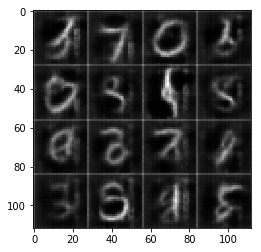

Epoch 2/2... Discriminator Loss: 1.2956 Generator Loss: 0.5355
Epoch 2/2... Discriminator Loss: 1.1700 Generator Loss: 0.7651
Epoch 2/2... Discriminator Loss: 1.2570 Generator Loss: 0.5783
Epoch 2/2... Discriminator Loss: 1.2426 Generator Loss: 0.5840
Epoch 2/2... Discriminator Loss: 1.3545 Generator Loss: 0.4539
Epoch 2/2... Discriminator Loss: 1.1901 Generator Loss: 0.8354
Epoch 2/2... Discriminator Loss: 1.3168 Generator Loss: 0.5503
Epoch 2/2... Discriminator Loss: 1.2869 Generator Loss: 0.6096
Epoch 2/2... Discriminator Loss: 1.1730 Generator Loss: 0.7552
Epoch 2/2... Discriminator Loss: 1.3543 Generator Loss: 0.6713


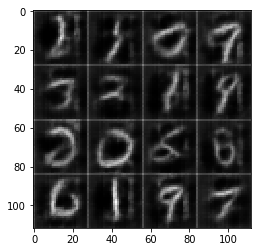

Epoch 2/2... Discriminator Loss: 1.1133 Generator Loss: 0.7715
Epoch 2/2... Discriminator Loss: 1.1080 Generator Loss: 0.8648
Epoch 2/2... Discriminator Loss: 1.2247 Generator Loss: 0.5500
Epoch 2/2... Discriminator Loss: 1.1957 Generator Loss: 0.6617
Epoch 2/2... Discriminator Loss: 1.4252 Generator Loss: 1.0575
Epoch 2/2... Discriminator Loss: 1.3134 Generator Loss: 0.5506
Epoch 2/2... Discriminator Loss: 1.2871 Generator Loss: 0.6571
Epoch 2/2... Discriminator Loss: 1.2122 Generator Loss: 0.9598
Epoch 2/2... Discriminator Loss: 1.2343 Generator Loss: 0.5502
Epoch 2/2... Discriminator Loss: 1.1007 Generator Loss: 0.7923


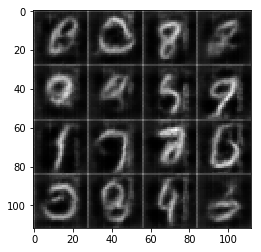

Epoch 2/2... Discriminator Loss: 1.0333 Generator Loss: 0.8461
Epoch 2/2... Discriminator Loss: 1.1769 Generator Loss: 0.7788
Epoch 2/2... Discriminator Loss: 1.2801 Generator Loss: 0.6200
Epoch 2/2... Discriminator Loss: 1.1693 Generator Loss: 0.7132
Epoch 2/2... Discriminator Loss: 1.0550 Generator Loss: 0.7160
Epoch 2/2... Discriminator Loss: 1.2952 Generator Loss: 0.5498
Epoch 2/2... Discriminator Loss: 1.2386 Generator Loss: 0.6171
Epoch 2/2... Discriminator Loss: 1.1282 Generator Loss: 0.6695
Epoch 2/2... Discriminator Loss: 1.2858 Generator Loss: 0.8376
Epoch 2/2... Discriminator Loss: 1.4795 Generator Loss: 1.5204


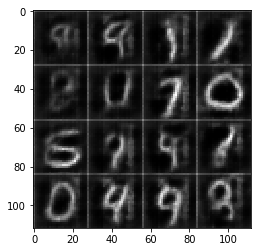

Epoch 2/2... Discriminator Loss: 1.2671 Generator Loss: 0.6329
Epoch 2/2... Discriminator Loss: 1.1416 Generator Loss: 0.7721
Epoch 2/2... Discriminator Loss: 1.0943 Generator Loss: 0.8731
Epoch 2/2... Discriminator Loss: 1.1837 Generator Loss: 0.6860
Epoch 2/2... Discriminator Loss: 1.2247 Generator Loss: 0.7579
Epoch 2/2... Discriminator Loss: 1.1580 Generator Loss: 0.7053
Epoch 2/2... Discriminator Loss: 1.1468 Generator Loss: 0.6838
Epoch 2/2... Discriminator Loss: 1.2264 Generator Loss: 1.0690
Epoch 2/2... Discriminator Loss: 1.1565 Generator Loss: 0.7287
Epoch 2/2... Discriminator Loss: 1.3035 Generator Loss: 0.6114


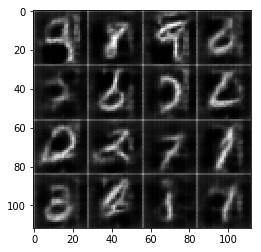

Epoch 2/2... Discriminator Loss: 1.3366 Generator Loss: 0.4828
Epoch 2/2... Discriminator Loss: 1.3182 Generator Loss: 0.8228
Epoch 2/2... Discriminator Loss: 1.3357 Generator Loss: 0.4998
Epoch 2/2... Discriminator Loss: 1.1366 Generator Loss: 0.9442
Epoch 2/2... Discriminator Loss: 1.0990 Generator Loss: 0.6920
Epoch 2/2... Discriminator Loss: 1.0783 Generator Loss: 0.8461
Epoch 2/2... Discriminator Loss: 1.2281 Generator Loss: 0.8472
Epoch 2/2... Discriminator Loss: 1.1432 Generator Loss: 0.9451
Epoch 2/2... Discriminator Loss: 1.1669 Generator Loss: 0.7432
Epoch 2/2... Discriminator Loss: 1.1010 Generator Loss: 0.7163


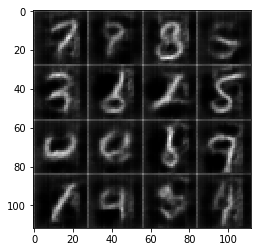

Epoch 2/2... Discriminator Loss: 1.6890 Generator Loss: 1.2196
Epoch 2/2... Discriminator Loss: 1.2481 Generator Loss: 0.7991
Epoch 2/2... Discriminator Loss: 1.2420 Generator Loss: 0.9085
Epoch 2/2... Discriminator Loss: 1.3003 Generator Loss: 0.5841
Epoch 2/2... Discriminator Loss: 1.2622 Generator Loss: 0.7104
End of Epoch...


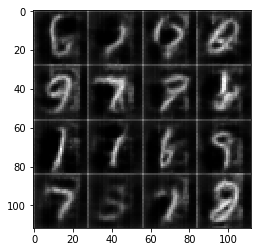

In [13]:
## First good one
#batch_size = 256
#z_dim = 100
#learning_rate = 0.0001
#beta1 = 0.5 to 0.2

## Attempt to make better
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 5.8272 Generator Loss: 0.0047
Epoch 1/1... Discriminator Loss: 5.6263 Generator Loss: 0.0058
Epoch 1/1... Discriminator Loss: 5.4676 Generator Loss: 0.0078
Epoch 1/1... Discriminator Loss: 4.9574 Generator Loss: 0.0127
Epoch 1/1... Discriminator Loss: 3.9065 Generator Loss: 0.0417
Epoch 1/1... Discriminator Loss: 3.1628 Generator Loss: 0.0813
Epoch 1/1... Discriminator Loss: 3.4397 Generator Loss: 0.0657
Epoch 1/1... Discriminator Loss: 3.1929 Generator Loss: 0.1064
Epoch 1/1... Discriminator Loss: 3.1878 Generator Loss: 0.1179
Epoch 1/1... Discriminator Loss: 3.0977 Generator Loss: 0.0909


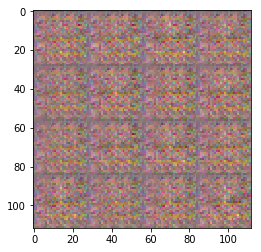

Epoch 1/1... Discriminator Loss: 2.8524 Generator Loss: 0.1658
Epoch 1/1... Discriminator Loss: 2.9582 Generator Loss: 0.1766
Epoch 1/1... Discriminator Loss: 2.0780 Generator Loss: 0.3224
Epoch 1/1... Discriminator Loss: 2.4586 Generator Loss: 0.3232
Epoch 1/1... Discriminator Loss: 1.6846 Generator Loss: 0.5443
Epoch 1/1... Discriminator Loss: 1.7436 Generator Loss: 0.4394
Epoch 1/1... Discriminator Loss: 1.4735 Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.9528 Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 1.7462 Generator Loss: 0.5778
Epoch 1/1... Discriminator Loss: 2.5518 Generator Loss: 0.3227


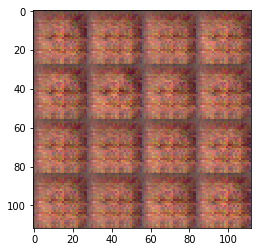

Epoch 1/1... Discriminator Loss: 1.5813 Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.6141 Generator Loss: 0.5961
Epoch 1/1... Discriminator Loss: 1.7096 Generator Loss: 0.7595
Epoch 1/1... Discriminator Loss: 1.2044 Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 2.2063 Generator Loss: 0.3067
Epoch 1/1... Discriminator Loss: 0.9256 Generator Loss: 1.0134
Epoch 1/1... Discriminator Loss: 1.3004 Generator Loss: 0.5999
Epoch 1/1... Discriminator Loss: 1.7595 Generator Loss: 0.6262
Epoch 1/1... Discriminator Loss: 0.8202 Generator Loss: 1.1356
Epoch 1/1... Discriminator Loss: 1.0177 Generator Loss: 0.9917


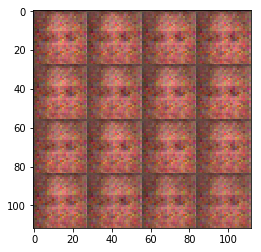

Epoch 1/1... Discriminator Loss: 1.2914 Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.0172 Generator Loss: 1.1277
Epoch 1/1... Discriminator Loss: 1.0453 Generator Loss: 0.8857
Epoch 1/1... Discriminator Loss: 0.8993 Generator Loss: 1.0932
Epoch 1/1... Discriminator Loss: 1.0258 Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 2.1187 Generator Loss: 0.4298
Epoch 1/1... Discriminator Loss: 0.6281 Generator Loss: 1.2913
Epoch 1/1... Discriminator Loss: 1.0441 Generator Loss: 0.9543
Epoch 1/1... Discriminator Loss: 0.8841 Generator Loss: 1.0601
Epoch 1/1... Discriminator Loss: 1.1309 Generator Loss: 0.6691


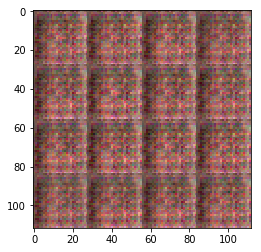

Epoch 1/1... Discriminator Loss: 0.5363 Generator Loss: 1.2017
Epoch 1/1... Discriminator Loss: 1.6796 Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 1.1889 Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 1.4262 Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 0.7384 Generator Loss: 1.2208
Epoch 1/1... Discriminator Loss: 2.2925 Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 1.2824 Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.3895 Generator Loss: 0.8711
Epoch 1/1... Discriminator Loss: 1.3185 Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 1.7819 Generator Loss: 0.4442


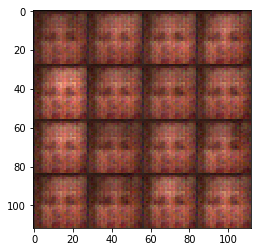

Epoch 1/1... Discriminator Loss: 1.7425 Generator Loss: 0.5004
Epoch 1/1... Discriminator Loss: 2.3217 Generator Loss: 0.4088
Epoch 1/1... Discriminator Loss: 1.1583 Generator Loss: 0.8198
Epoch 1/1... Discriminator Loss: 1.1321 Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.2875 Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 1.5963 Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.4843 Generator Loss: 0.6656
Epoch 1/1... Discriminator Loss: 1.4085 Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.0771 Generator Loss: 0.7874
Epoch 1/1... Discriminator Loss: 1.6014 Generator Loss: 0.5664


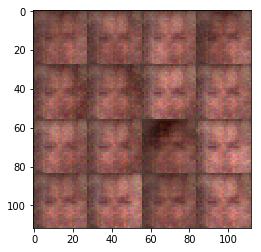

Epoch 1/1... Discriminator Loss: 1.6163 Generator Loss: 0.4800
Epoch 1/1... Discriminator Loss: 1.3262 Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.3171 Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.9987 Generator Loss: 0.4651
Epoch 1/1... Discriminator Loss: 1.7772 Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.6156 Generator Loss: 0.5751
Epoch 1/1... Discriminator Loss: 1.5477 Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.2788 Generator Loss: 0.6972
Epoch 1/1... Discriminator Loss: 1.5682 Generator Loss: 0.5443
Epoch 1/1... Discriminator Loss: 1.6265 Generator Loss: 0.5241


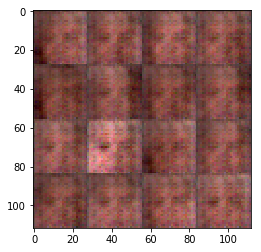

Epoch 1/1... Discriminator Loss: 1.4835 Generator Loss: 0.6205
Epoch 1/1... Discriminator Loss: 1.3751 Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 1.6322 Generator Loss: 0.5177
Epoch 1/1... Discriminator Loss: 1.4781 Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.5778 Generator Loss: 0.4621
Epoch 1/1... Discriminator Loss: 1.7321 Generator Loss: 0.4958
Epoch 1/1... Discriminator Loss: 1.3927 Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.4884 Generator Loss: 0.5929
Epoch 1/1... Discriminator Loss: 1.4788 Generator Loss: 0.5950
Epoch 1/1... Discriminator Loss: 1.6552 Generator Loss: 0.5170


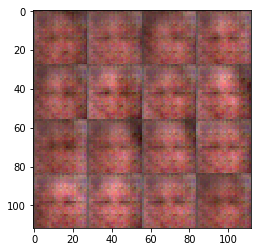

Epoch 1/1... Discriminator Loss: 1.4526 Generator Loss: 0.6019
Epoch 1/1... Discriminator Loss: 1.6882 Generator Loss: 0.5113
Epoch 1/1... Discriminator Loss: 1.4553 Generator Loss: 0.5834
Epoch 1/1... Discriminator Loss: 1.3007 Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.3841 Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.7365 Generator Loss: 0.4749
Epoch 1/1... Discriminator Loss: 1.3520 Generator Loss: 0.6225
Epoch 1/1... Discriminator Loss: 1.5576 Generator Loss: 0.5490
Epoch 1/1... Discriminator Loss: 1.7419 Generator Loss: 0.5053
Epoch 1/1... Discriminator Loss: 1.4702 Generator Loss: 0.6404


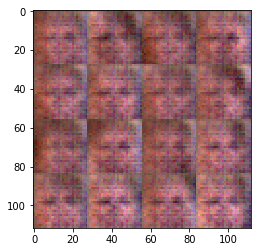

Epoch 1/1... Discriminator Loss: 1.4392 Generator Loss: 0.5825
Epoch 1/1... Discriminator Loss: 1.5434 Generator Loss: 0.5499
Epoch 1/1... Discriminator Loss: 1.6389 Generator Loss: 0.5319
Epoch 1/1... Discriminator Loss: 1.3631 Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.2862 Generator Loss: 0.6717
Epoch 1/1... Discriminator Loss: 1.4403 Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.5756 Generator Loss: 0.5638
Epoch 1/1... Discriminator Loss: 1.5423 Generator Loss: 0.5482
Epoch 1/1... Discriminator Loss: 1.4362 Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 1.7327 Generator Loss: 0.5097


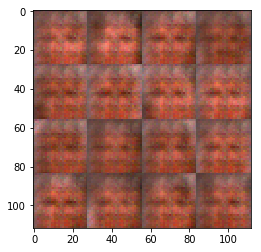

Epoch 1/1... Discriminator Loss: 1.4980 Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.5600 Generator Loss: 0.5207
Epoch 1/1... Discriminator Loss: 1.5438 Generator Loss: 0.5917
Epoch 1/1... Discriminator Loss: 1.6557 Generator Loss: 0.5381
Epoch 1/1... Discriminator Loss: 1.5863 Generator Loss: 0.5618
Epoch 1/1... Discriminator Loss: 1.4309 Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 1.4478 Generator Loss: 0.6118
Epoch 1/1... Discriminator Loss: 1.7082 Generator Loss: 0.5099
Epoch 1/1... Discriminator Loss: 1.5471 Generator Loss: 0.5939
Epoch 1/1... Discriminator Loss: 1.4823 Generator Loss: 0.6236


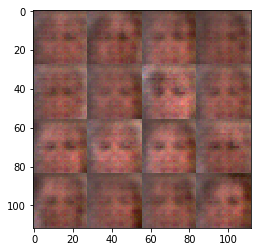

Epoch 1/1... Discriminator Loss: 1.4533 Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.6138 Generator Loss: 0.5725
Epoch 1/1... Discriminator Loss: 1.5243 Generator Loss: 0.5190
Epoch 1/1... Discriminator Loss: 1.4304 Generator Loss: 0.6529
Epoch 1/1... Discriminator Loss: 1.7185 Generator Loss: 0.4707
Epoch 1/1... Discriminator Loss: 1.5204 Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.4598 Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 1.3890 Generator Loss: 0.6448
Epoch 1/1... Discriminator Loss: 1.4494 Generator Loss: 0.6106
Epoch 1/1... Discriminator Loss: 1.4564 Generator Loss: 0.6138


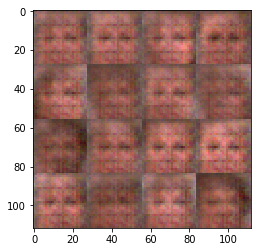

Epoch 1/1... Discriminator Loss: 1.4381 Generator Loss: 0.6124
Epoch 1/1... Discriminator Loss: 1.4805 Generator Loss: 0.6106
Epoch 1/1... Discriminator Loss: 1.6149 Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 1.4264 Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.4280 Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.4085 Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.3831 Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.5922 Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.4318 Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 1.5415 Generator Loss: 0.5806


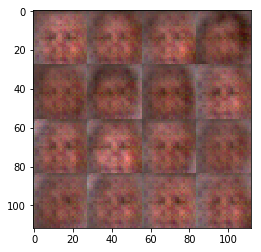

Epoch 1/1... Discriminator Loss: 1.5851 Generator Loss: 0.5500
Epoch 1/1... Discriminator Loss: 1.5699 Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.4483 Generator Loss: 0.6769
Epoch 1/1... Discriminator Loss: 1.5536 Generator Loss: 0.5964
Epoch 1/1... Discriminator Loss: 1.5578 Generator Loss: 0.5715
Epoch 1/1... Discriminator Loss: 1.5407 Generator Loss: 0.5132
Epoch 1/1... Discriminator Loss: 1.5487 Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.6806 Generator Loss: 0.5764
Epoch 1/1... Discriminator Loss: 1.5766 Generator Loss: 0.5336
Epoch 1/1... Discriminator Loss: 1.5226 Generator Loss: 0.6303


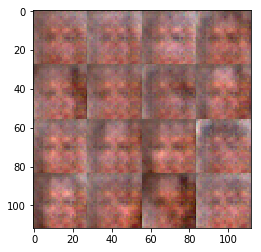

Epoch 1/1... Discriminator Loss: 1.5231 Generator Loss: 0.5874
Epoch 1/1... Discriminator Loss: 1.4774 Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 1.4065 Generator Loss: 0.7174
Epoch 1/1... Discriminator Loss: 1.4947 Generator Loss: 0.6124
Epoch 1/1... Discriminator Loss: 1.3573 Generator Loss: 0.7018
Epoch 1/1... Discriminator Loss: 1.5557 Generator Loss: 0.5313
Epoch 1/1... Discriminator Loss: 1.5001 Generator Loss: 0.6474
Epoch 1/1... Discriminator Loss: 1.3537 Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.3476 Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.4123 Generator Loss: 0.6424


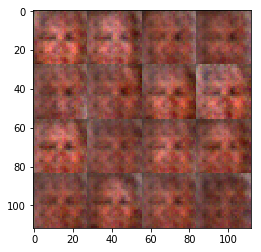

Epoch 1/1... Discriminator Loss: 1.5662 Generator Loss: 0.5780
Epoch 1/1... Discriminator Loss: 1.4521 Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.5425 Generator Loss: 0.5501
Epoch 1/1... Discriminator Loss: 1.5187 Generator Loss: 0.5542
Epoch 1/1... Discriminator Loss: 1.4408 Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 1.4971 Generator Loss: 0.5857
Epoch 1/1... Discriminator Loss: 1.4824 Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.4936 Generator Loss: 0.5643
Epoch 1/1... Discriminator Loss: 1.5139 Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.5617 Generator Loss: 0.6095


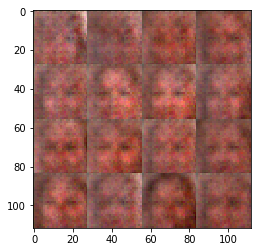

Epoch 1/1... Discriminator Loss: 1.4232 Generator Loss: 0.5895
Epoch 1/1... Discriminator Loss: 1.4245 Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.4659 Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 1.4985 Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.5620 Generator Loss: 0.5694
Epoch 1/1... Discriminator Loss: 1.4597 Generator Loss: 0.5990
Epoch 1/1... Discriminator Loss: 1.3358 Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.5418 Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.4841 Generator Loss: 0.5386
Epoch 1/1... Discriminator Loss: 1.3577 Generator Loss: 0.6312


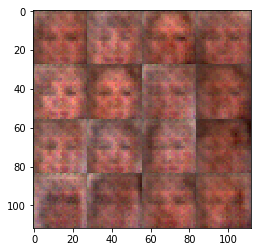

Epoch 1/1... Discriminator Loss: 1.4867 Generator Loss: 0.5920
Epoch 1/1... Discriminator Loss: 1.4983 Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.5474 Generator Loss: 0.5871
Epoch 1/1... Discriminator Loss: 1.4031 Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.4366 Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.2784 Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 1.2853 Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 1.5833 Generator Loss: 0.6085
Epoch 1/1... Discriminator Loss: 1.4399 Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 1.2728 Generator Loss: 0.7104


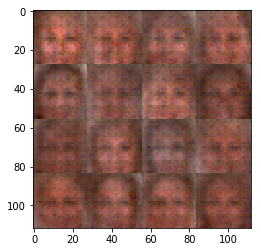

Epoch 1/1... Discriminator Loss: 1.4560 Generator Loss: 0.5854
Epoch 1/1... Discriminator Loss: 1.3438 Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 1.3505 Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.4969 Generator Loss: 0.5959
Epoch 1/1... Discriminator Loss: 1.4162 Generator Loss: 0.5861
Epoch 1/1... Discriminator Loss: 1.3537 Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.5194 Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.5028 Generator Loss: 0.5950
Epoch 1/1... Discriminator Loss: 1.3853 Generator Loss: 0.7572
Epoch 1/1... Discriminator Loss: 1.4191 Generator Loss: 0.5651


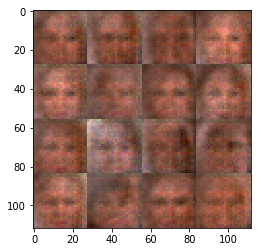

Epoch 1/1... Discriminator Loss: 1.3116 Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 1.5373 Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 1.6013 Generator Loss: 0.5411
Epoch 1/1... Discriminator Loss: 1.4196 Generator Loss: 0.6817
Epoch 1/1... Discriminator Loss: 1.5143 Generator Loss: 0.5326
Epoch 1/1... Discriminator Loss: 1.4435 Generator Loss: 0.6529
Epoch 1/1... Discriminator Loss: 1.4572 Generator Loss: 0.5910
Epoch 1/1... Discriminator Loss: 1.4446 Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.4813 Generator Loss: 0.5618
Epoch 1/1... Discriminator Loss: 1.4524 Generator Loss: 0.5726


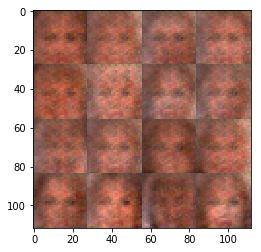

Epoch 1/1... Discriminator Loss: 1.4399 Generator Loss: 0.5661
Epoch 1/1... Discriminator Loss: 1.4428 Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.4224 Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.4448 Generator Loss: 0.6177
Epoch 1/1... Discriminator Loss: 1.5482 Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.4553 Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.4883 Generator Loss: 0.5809
Epoch 1/1... Discriminator Loss: 1.3818 Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.4571 Generator Loss: 0.5971
Epoch 1/1... Discriminator Loss: 1.4643 Generator Loss: 0.6702


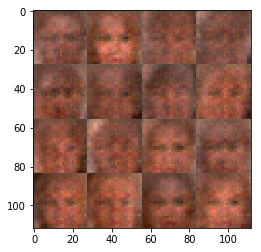

Epoch 1/1... Discriminator Loss: 1.4192 Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.5030 Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.3485 Generator Loss: 0.6558
Epoch 1/1... Discriminator Loss: 1.4335 Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.4640 Generator Loss: 0.5794
Epoch 1/1... Discriminator Loss: 1.4190 Generator Loss: 0.6474
Epoch 1/1... Discriminator Loss: 1.5333 Generator Loss: 0.5541
Epoch 1/1... Discriminator Loss: 1.5274 Generator Loss: 0.6057
Epoch 1/1... Discriminator Loss: 1.6185 Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.5480 Generator Loss: 0.5781


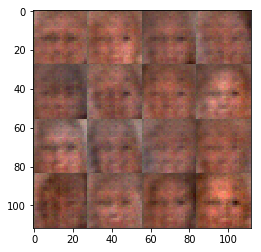

Epoch 1/1... Discriminator Loss: 1.4586 Generator Loss: 0.6417
Epoch 1/1... Discriminator Loss: 1.5479 Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.3792 Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.4520 Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.3702 Generator Loss: 0.6102
Epoch 1/1... Discriminator Loss: 1.3532 Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.4646 Generator Loss: 0.5999
Epoch 1/1... Discriminator Loss: 1.5077 Generator Loss: 0.5849
Epoch 1/1... Discriminator Loss: 1.5019 Generator Loss: 0.5723
Epoch 1/1... Discriminator Loss: 1.4375 Generator Loss: 0.6133


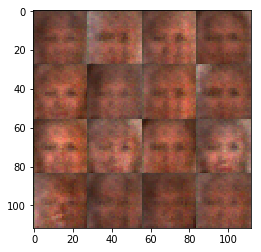

Epoch 1/1... Discriminator Loss: 1.4455 Generator Loss: 0.5850
Epoch 1/1... Discriminator Loss: 1.4415 Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.5520 Generator Loss: 0.5559
Epoch 1/1... Discriminator Loss: 1.4441 Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.3419 Generator Loss: 0.7508
Epoch 1/1... Discriminator Loss: 1.4729 Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 1.3631 Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 1.4491 Generator Loss: 0.5853
Epoch 1/1... Discriminator Loss: 1.4498 Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 1.4290 Generator Loss: 0.6614


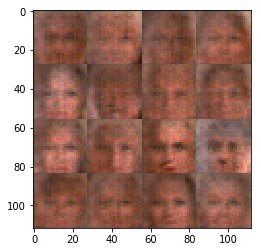

Epoch 1/1... Discriminator Loss: 1.3913 Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.4916 Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.4066 Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.4023 Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.4947 Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.3335 Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 1.4621 Generator Loss: 0.5928
Epoch 1/1... Discriminator Loss: 1.3947 Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.5238 Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 1.4786 Generator Loss: 0.5802


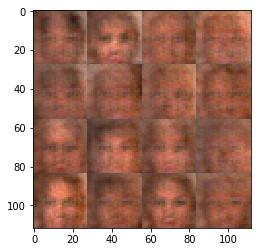

Epoch 1/1... Discriminator Loss: 1.4326 Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 1.3541 Generator Loss: 0.6657
Epoch 1/1... Discriminator Loss: 1.4358 Generator Loss: 0.6272
Epoch 1/1... Discriminator Loss: 1.5583 Generator Loss: 0.5131
Epoch 1/1... Discriminator Loss: 1.4331 Generator Loss: 0.6327
Epoch 1/1... Discriminator Loss: 1.5847 Generator Loss: 0.5385
Epoch 1/1... Discriminator Loss: 1.4918 Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.4411 Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 1.3041 Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.4812 Generator Loss: 0.5940


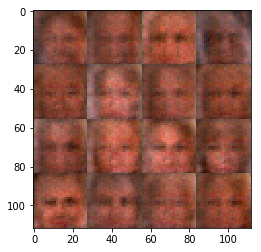

Epoch 1/1... Discriminator Loss: 1.4426 Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.3141 Generator Loss: 0.6498
Epoch 1/1... Discriminator Loss: 1.5189 Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.4401 Generator Loss: 0.6129
Epoch 1/1... Discriminator Loss: 1.4044 Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.5228 Generator Loss: 0.5740
Epoch 1/1... Discriminator Loss: 1.2902 Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.5780 Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.3583 Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.5443 Generator Loss: 0.6452


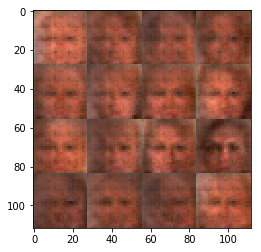

Epoch 1/1... Discriminator Loss: 1.5000 Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.4478 Generator Loss: 0.6037
Epoch 1/1... Discriminator Loss: 1.4086 Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.4220 Generator Loss: 0.6183
Epoch 1/1... Discriminator Loss: 1.3263 Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.4352 Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.3772 Generator Loss: 0.6872
Epoch 1/1... Discriminator Loss: 1.3980 Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.5167 Generator Loss: 0.5730
Epoch 1/1... Discriminator Loss: 1.4077 Generator Loss: 0.6841


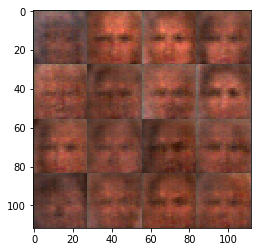

Epoch 1/1... Discriminator Loss: 1.3561 Generator Loss: 0.7199
Epoch 1/1... Discriminator Loss: 1.4914 Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.4249 Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 1.3442 Generator Loss: 0.5769
Epoch 1/1... Discriminator Loss: 1.3906 Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.3234 Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.3975 Generator Loss: 0.6231
Epoch 1/1... Discriminator Loss: 1.4526 Generator Loss: 0.5872
Epoch 1/1... Discriminator Loss: 1.3365 Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.3795 Generator Loss: 0.6035


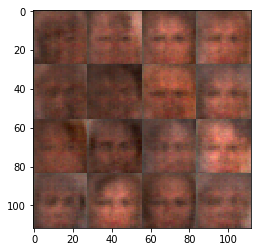

Epoch 1/1... Discriminator Loss: 1.3918 Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.4441 Generator Loss: 0.6647
Epoch 1/1... Discriminator Loss: 1.4856 Generator Loss: 0.5819
Epoch 1/1... Discriminator Loss: 1.4198 Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.4218 Generator Loss: 0.6374
Epoch 1/1... Discriminator Loss: 1.3873 Generator Loss: 0.5938
Epoch 1/1... Discriminator Loss: 1.4576 Generator Loss: 0.6453
Epoch 1/1... Discriminator Loss: 1.5091 Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.5680 Generator Loss: 0.5836
Epoch 1/1... Discriminator Loss: 1.5546 Generator Loss: 0.5543


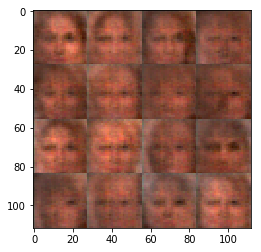

Epoch 1/1... Discriminator Loss: 1.4106 Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 1.4416 Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.3821 Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.4958 Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.5722 Generator Loss: 0.5437
Epoch 1/1... Discriminator Loss: 1.4596 Generator Loss: 0.5242
Epoch 1/1... Discriminator Loss: 1.5625 Generator Loss: 0.5568
Epoch 1/1... Discriminator Loss: 1.4494 Generator Loss: 0.6969
Epoch 1/1... Discriminator Loss: 1.5206 Generator Loss: 0.6321
Epoch 1/1... Discriminator Loss: 1.4651 Generator Loss: 0.6303


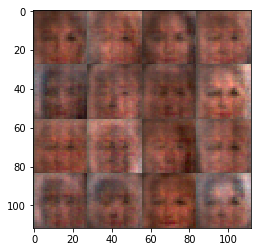

Epoch 1/1... Discriminator Loss: 1.3823 Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.4788 Generator Loss: 0.6129
Epoch 1/1... Discriminator Loss: 1.4539 Generator Loss: 0.6408
Epoch 1/1... Discriminator Loss: 1.4887 Generator Loss: 0.5717
Epoch 1/1... Discriminator Loss: 1.4474 Generator Loss: 0.5817
Epoch 1/1... Discriminator Loss: 1.4631 Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.4376 Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.4329 Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.4711 Generator Loss: 0.6288
Epoch 1/1... Discriminator Loss: 1.3994 Generator Loss: 0.6847


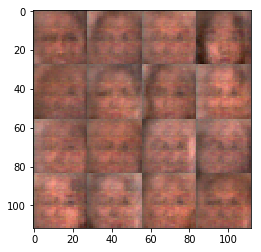

Epoch 1/1... Discriminator Loss: 1.4831 Generator Loss: 0.6475
Epoch 1/1... Discriminator Loss: 1.4572 Generator Loss: 0.6272
Epoch 1/1... Discriminator Loss: 1.4848 Generator Loss: 0.6223
Epoch 1/1... Discriminator Loss: 1.2770 Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.4495 Generator Loss: 0.5636
Epoch 1/1... Discriminator Loss: 1.2749 Generator Loss: 0.7516
Epoch 1/1... Discriminator Loss: 1.4359 Generator Loss: 0.5987
Epoch 1/1... Discriminator Loss: 1.4414 Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 1.4003 Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.3468 Generator Loss: 0.6780


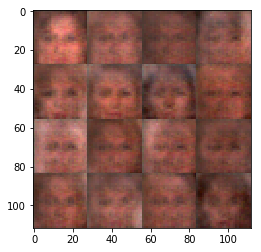

Epoch 1/1... Discriminator Loss: 1.4856 Generator Loss: 0.6410
Epoch 1/1... Discriminator Loss: 1.3801 Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.5625 Generator Loss: 0.5752
Epoch 1/1... Discriminator Loss: 1.3700 Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.4193 Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 1.5320 Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.3612 Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.5543 Generator Loss: 0.5551
Epoch 1/1... Discriminator Loss: 1.2070 Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 1.4370 Generator Loss: 0.6167


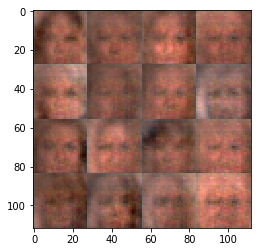

Epoch 1/1... Discriminator Loss: 1.4808 Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.4631 Generator Loss: 0.5798
Epoch 1/1... Discriminator Loss: 1.3692 Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.5110 Generator Loss: 0.6407
Epoch 1/1... Discriminator Loss: 1.4331 Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 1.3849 Generator Loss: 0.7064
Epoch 1/1... Discriminator Loss: 1.3016 Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.4428 Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.4841 Generator Loss: 0.6020
Epoch 1/1... Discriminator Loss: 1.4003 Generator Loss: 0.6242


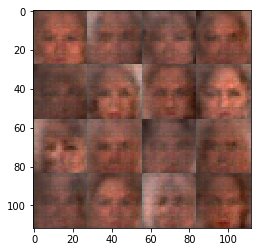

Epoch 1/1... Discriminator Loss: 1.5456 Generator Loss: 0.5444
Epoch 1/1... Discriminator Loss: 1.4373 Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.4120 Generator Loss: 0.6234
Epoch 1/1... Discriminator Loss: 1.5319 Generator Loss: 0.5510
Epoch 1/1... Discriminator Loss: 1.4899 Generator Loss: 0.6211
Epoch 1/1... Discriminator Loss: 1.4487 Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.4654 Generator Loss: 0.6476
Epoch 1/1... Discriminator Loss: 1.4294 Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.5564 Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.4374 Generator Loss: 0.6181


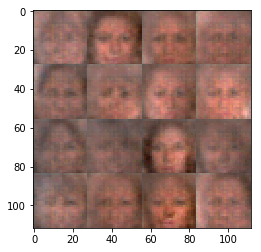

Epoch 1/1... Discriminator Loss: 1.5597 Generator Loss: 0.5857
Epoch 1/1... Discriminator Loss: 1.3958 Generator Loss: 0.6249
Epoch 1/1... Discriminator Loss: 1.4996 Generator Loss: 0.5643
Epoch 1/1... Discriminator Loss: 1.4241 Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.3830 Generator Loss: 0.6618
Epoch 1/1... Discriminator Loss: 1.4091 Generator Loss: 0.6055
Epoch 1/1... Discriminator Loss: 1.4919 Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.5257 Generator Loss: 0.5413
Epoch 1/1... Discriminator Loss: 1.4282 Generator Loss: 0.5765
Epoch 1/1... Discriminator Loss: 1.4342 Generator Loss: 0.6251


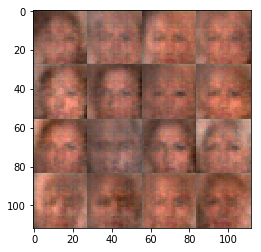

Epoch 1/1... Discriminator Loss: 1.4253 Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.2952 Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.4387 Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.4346 Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.4320 Generator Loss: 0.6234
Epoch 1/1... Discriminator Loss: 1.4553 Generator Loss: 0.6468
Epoch 1/1... Discriminator Loss: 1.3988 Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.6076 Generator Loss: 0.5797
Epoch 1/1... Discriminator Loss: 1.5279 Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.5472 Generator Loss: 0.7472


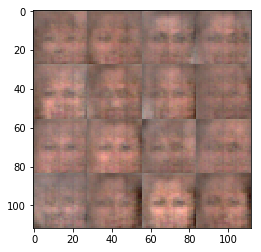

Epoch 1/1... Discriminator Loss: 1.4456 Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.4394 Generator Loss: 0.5647
Epoch 1/1... Discriminator Loss: 1.4546 Generator Loss: 0.6540
Epoch 1/1... Discriminator Loss: 1.3870 Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 1.4009 Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.3913 Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.2914 Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.3469 Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.4694 Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 1.4184 Generator Loss: 0.6362


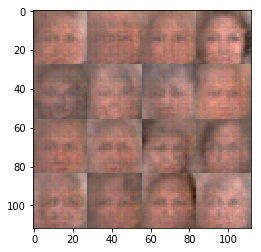

Epoch 1/1... Discriminator Loss: 1.4331 Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.4954 Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.4994 Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 1.2965 Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 1.5515 Generator Loss: 0.6335
Epoch 1/1... Discriminator Loss: 1.3683 Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.5491 Generator Loss: 0.6067
Epoch 1/1... Discriminator Loss: 1.3824 Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.4156 Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3337 Generator Loss: 0.6818


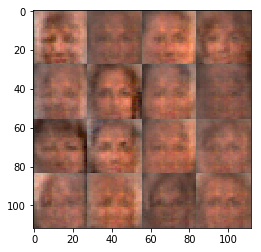

Epoch 1/1... Discriminator Loss: 1.4760 Generator Loss: 0.5980
Epoch 1/1... Discriminator Loss: 1.4970 Generator Loss: 0.6449
Epoch 1/1... Discriminator Loss: 1.3491 Generator Loss: 0.7174
Epoch 1/1... Discriminator Loss: 1.6629 Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.2214 Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.3209 Generator Loss: 0.6364
Epoch 1/1... Discriminator Loss: 1.5249 Generator Loss: 0.5563
Epoch 1/1... Discriminator Loss: 1.3438 Generator Loss: 0.7674
Epoch 1/1... Discriminator Loss: 1.4930 Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.4326 Generator Loss: 0.6460


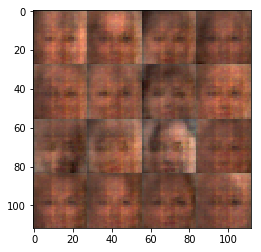

Epoch 1/1... Discriminator Loss: 1.3481 Generator Loss: 0.7386
Epoch 1/1... Discriminator Loss: 1.4559 Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.3885 Generator Loss: 0.6253
Epoch 1/1... Discriminator Loss: 1.4860 Generator Loss: 0.6183
Epoch 1/1... Discriminator Loss: 1.4507 Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.3745 Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.4533 Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.5141 Generator Loss: 0.5744
Epoch 1/1... Discriminator Loss: 1.2188 Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.5916 Generator Loss: 0.5363


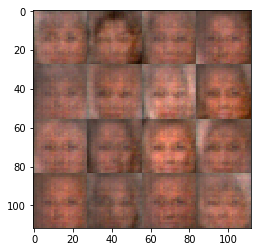

Epoch 1/1... Discriminator Loss: 1.4137 Generator Loss: 0.6297
Epoch 1/1... Discriminator Loss: 1.3576 Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.4053 Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.3471 Generator Loss: 0.6534
Epoch 1/1... Discriminator Loss: 1.4470 Generator Loss: 0.5831
Epoch 1/1... Discriminator Loss: 1.4518 Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.4461 Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.3869 Generator Loss: 0.6808
Epoch 1/1... Discriminator Loss: 1.4558 Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.4795 Generator Loss: 0.6094


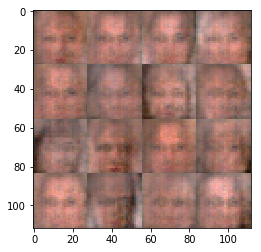

Epoch 1/1... Discriminator Loss: 1.5000 Generator Loss: 0.6382
Epoch 1/1... Discriminator Loss: 1.5086 Generator Loss: 0.6115
Epoch 1/1... Discriminator Loss: 1.5604 Generator Loss: 0.5765
Epoch 1/1... Discriminator Loss: 1.3584 Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 1.4667 Generator Loss: 0.6086
Epoch 1/1... Discriminator Loss: 1.4012 Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 1.3744 Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.5296 Generator Loss: 0.5450
Epoch 1/1... Discriminator Loss: 1.4444 Generator Loss: 0.6420
Epoch 1/1... Discriminator Loss: 1.4077 Generator Loss: 0.7109


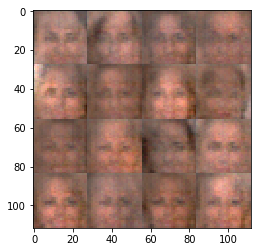

Epoch 1/1... Discriminator Loss: 1.4221 Generator Loss: 0.6475
Epoch 1/1... Discriminator Loss: 1.4099 Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.4183 Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 1.4279 Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.4220 Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.3843 Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.4059 Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.5808 Generator Loss: 0.5898
Epoch 1/1... Discriminator Loss: 1.4332 Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.3685 Generator Loss: 0.6768


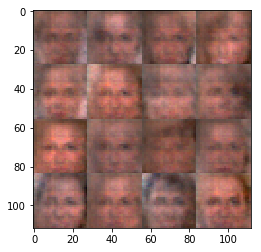

Epoch 1/1... Discriminator Loss: 1.4428 Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.3884 Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.3919 Generator Loss: 0.6148
Epoch 1/1... Discriminator Loss: 1.4282 Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.4854 Generator Loss: 0.5876
Epoch 1/1... Discriminator Loss: 1.4077 Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.4326 Generator Loss: 0.6115
Epoch 1/1... Discriminator Loss: 1.4339 Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.3423 Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 1.3844 Generator Loss: 0.6706


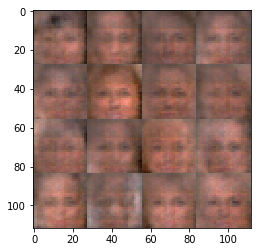

Epoch 1/1... Discriminator Loss: 1.4277 Generator Loss: 0.6088
Epoch 1/1... Discriminator Loss: 1.4045 Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.3946 Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.3947 Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 1.5794 Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.4311 Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.3452 Generator Loss: 0.6681
Epoch 1/1... Discriminator Loss: 1.4433 Generator Loss: 0.6739
Epoch 1/1... Discriminator Loss: 1.3680 Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.3686 Generator Loss: 0.6303


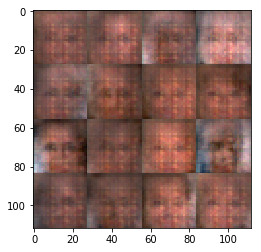

Epoch 1/1... Discriminator Loss: 1.5951 Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.3619 Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.6239 Generator Loss: 0.5896
Epoch 1/1... Discriminator Loss: 1.4139 Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.3937 Generator Loss: 0.6469
Epoch 1/1... Discriminator Loss: 1.5123 Generator Loss: 0.6483
Epoch 1/1... Discriminator Loss: 1.5112 Generator Loss: 0.6133
Epoch 1/1... Discriminator Loss: 1.4597 Generator Loss: 0.6254
Epoch 1/1... Discriminator Loss: 1.3609 Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.5300 Generator Loss: 0.6053


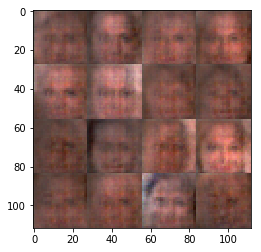

Epoch 1/1... Discriminator Loss: 1.4102 Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.5436 Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.4497 Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.4912 Generator Loss: 0.6007
Epoch 1/1... Discriminator Loss: 1.3470 Generator Loss: 0.6262
Epoch 1/1... Discriminator Loss: 1.4685 Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.4561 Generator Loss: 0.6127
Epoch 1/1... Discriminator Loss: 1.4193 Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.4058 Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.3914 Generator Loss: 0.6505


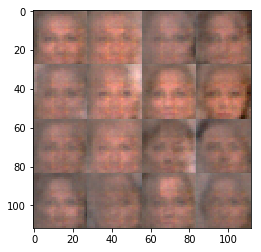

Epoch 1/1... Discriminator Loss: 1.3003 Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 1.3902 Generator Loss: 0.6577
Epoch 1/1... Discriminator Loss: 1.4237 Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.3571 Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.3119 Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.4907 Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.3666 Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.3966 Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.4263 Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.4284 Generator Loss: 0.6330


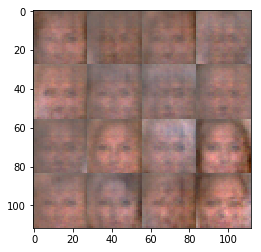

Epoch 1/1... Discriminator Loss: 1.3108 Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.4805 Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.4497 Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.4161 Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 1.2198 Generator Loss: 0.8485
Epoch 1/1... Discriminator Loss: 1.3659 Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.4524 Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.4095 Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 1.5357 Generator Loss: 0.6466
Epoch 1/1... Discriminator Loss: 1.3769 Generator Loss: 0.6677


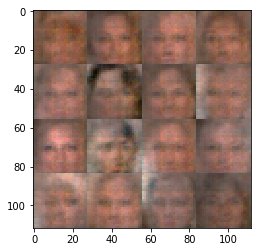

Epoch 1/1... Discriminator Loss: 1.4633 Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 1.5601 Generator Loss: 0.5707
Epoch 1/1... Discriminator Loss: 1.3793 Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.5524 Generator Loss: 0.6100
Epoch 1/1... Discriminator Loss: 1.5914 Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 1.3584 Generator Loss: 0.6569
Epoch 1/1... Discriminator Loss: 1.4883 Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.2227 Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.2673 Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.4585 Generator Loss: 0.6077


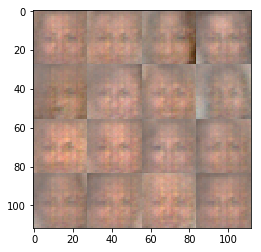

Epoch 1/1... Discriminator Loss: 1.2620 Generator Loss: 0.8205
Epoch 1/1... Discriminator Loss: 1.4163 Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.4887 Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.4616 Generator Loss: 0.5865
Epoch 1/1... Discriminator Loss: 1.3359 Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.4126 Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.4704 Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.4179 Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.3995 Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.5273 Generator Loss: 0.6038


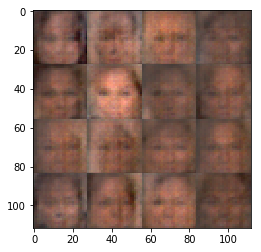

Epoch 1/1... Discriminator Loss: 1.4464 Generator Loss: 0.5980
Epoch 1/1... Discriminator Loss: 1.3912 Generator Loss: 0.6964
Epoch 1/1... Discriminator Loss: 1.5369 Generator Loss: 0.6023
Epoch 1/1... Discriminator Loss: 1.4025 Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.2245 Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.3345 Generator Loss: 0.6374
Epoch 1/1... Discriminator Loss: 1.4402 Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.5424 Generator Loss: 0.5911
Epoch 1/1... Discriminator Loss: 1.4162 Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.2835 Generator Loss: 0.7237


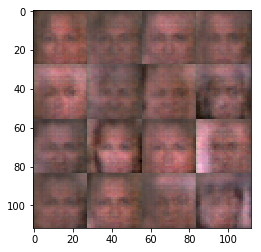

Epoch 1/1... Discriminator Loss: 1.3921 Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.6484 Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.2980 Generator Loss: 0.6939
Epoch 1/1... Discriminator Loss: 1.4511 Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 1.4235 Generator Loss: 0.6850
Epoch 1/1... Discriminator Loss: 1.4795 Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.3136 Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.5320 Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.3776 Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.3181 Generator Loss: 0.6951


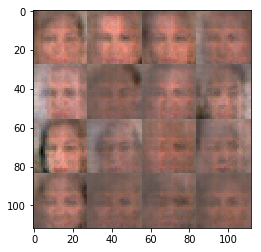

Epoch 1/1... Discriminator Loss: 1.5063 Generator Loss: 0.6364
Epoch 1/1... Discriminator Loss: 1.4594 Generator Loss: 0.6492
Epoch 1/1... Discriminator Loss: 1.1711 Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.5113 Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 1.4428 Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 1.4437 Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.4482 Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.4331 Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.4010 Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.4665 Generator Loss: 0.6312


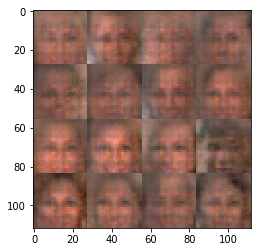

Epoch 1/1... Discriminator Loss: 1.4323 Generator Loss: 0.6590
Epoch 1/1... Discriminator Loss: 1.5069 Generator Loss: 0.5551
Epoch 1/1... Discriminator Loss: 1.4509 Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 1.3565 Generator Loss: 0.6856
Epoch 1/1... Discriminator Loss: 1.3920 Generator Loss: 0.6774
Epoch 1/1... Discriminator Loss: 1.3935 Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.4663 Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 1.4623 Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.5398 Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.5311 Generator Loss: 0.5668


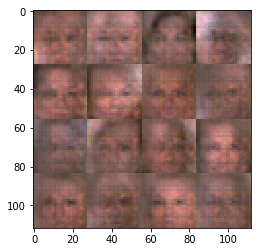

Epoch 1/1... Discriminator Loss: 1.3985 Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.4321 Generator Loss: 0.6582
Epoch 1/1... Discriminator Loss: 1.3799 Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.3948 Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.4032 Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.3758 Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.2433 Generator Loss: 0.7338
Epoch 1/1... Discriminator Loss: 1.3112 Generator Loss: 0.7597
Epoch 1/1... Discriminator Loss: 1.5099 Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.3783 Generator Loss: 0.6473


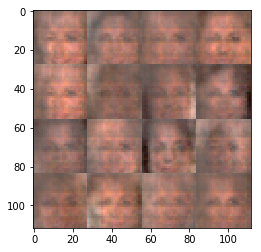

Epoch 1/1... Discriminator Loss: 1.4207 Generator Loss: 0.6539
Epoch 1/1... Discriminator Loss: 1.4578 Generator Loss: 0.7296
Epoch 1/1... Discriminator Loss: 1.3851 Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.4486 Generator Loss: 0.5826
Epoch 1/1... Discriminator Loss: 1.4016 Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.5065 Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.4125 Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.3628 Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 1.5011 Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.4526 Generator Loss: 0.6498


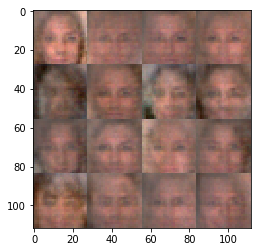

Epoch 1/1... Discriminator Loss: 1.4155 Generator Loss: 0.6603
Epoch 1/1... Discriminator Loss: 1.4605 Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.3409 Generator Loss: 0.7039
Epoch 1/1... Discriminator Loss: 1.3808 Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.4421 Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.3620 Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.6036 Generator Loss: 0.5384
Epoch 1/1... Discriminator Loss: 1.4723 Generator Loss: 0.5891
Epoch 1/1... Discriminator Loss: 1.4668 Generator Loss: 0.5847
Epoch 1/1... Discriminator Loss: 1.5381 Generator Loss: 0.5755


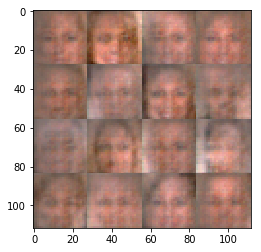

Epoch 1/1... Discriminator Loss: 1.3998 Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.3655 Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.5038 Generator Loss: 0.6319
Epoch 1/1... Discriminator Loss: 1.3917 Generator Loss: 0.6811
Epoch 1/1... Discriminator Loss: 1.3787 Generator Loss: 0.6546
Epoch 1/1... Discriminator Loss: 1.3862 Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.3152 Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.2629 Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 1.5129 Generator Loss: 0.6140
Epoch 1/1... Discriminator Loss: 1.3367 Generator Loss: 0.6728


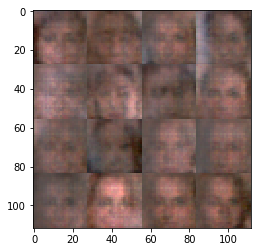

Epoch 1/1... Discriminator Loss: 1.5474 Generator Loss: 0.5949
Epoch 1/1... Discriminator Loss: 1.4324 Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.4665 Generator Loss: 0.6439
Epoch 1/1... Discriminator Loss: 1.5009 Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.3986 Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 1.3789 Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.2627 Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.4255 Generator Loss: 0.5951
Epoch 1/1... Discriminator Loss: 1.4548 Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 1.3589 Generator Loss: 0.7054


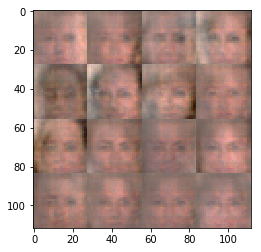

Epoch 1/1... Discriminator Loss: 1.4745 Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.4813 Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.4402 Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.3904 Generator Loss: 0.6568
Epoch 1/1... Discriminator Loss: 1.4659 Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.4012 Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.4158 Generator Loss: 0.5846
Epoch 1/1... Discriminator Loss: 1.3876 Generator Loss: 0.6465
Epoch 1/1... Discriminator Loss: 1.4172 Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.4162 Generator Loss: 0.6893


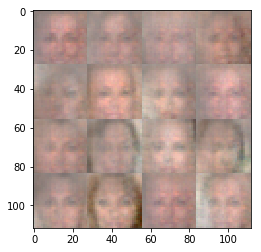

Epoch 1/1... Discriminator Loss: 1.4494 Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.4323 Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.4530 Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.2521 Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.4344 Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.3753 Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.5845 Generator Loss: 0.6081
Epoch 1/1... Discriminator Loss: 1.4582 Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.4429 Generator Loss: 0.6275
Epoch 1/1... Discriminator Loss: 1.4724 Generator Loss: 0.6273


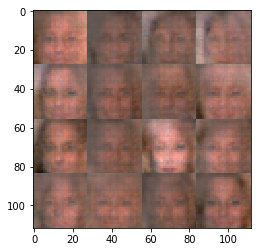

Epoch 1/1... Discriminator Loss: 1.4609 Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.4101 Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.4201 Generator Loss: 0.7263
Epoch 1/1... Discriminator Loss: 1.4502 Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.4136 Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.3989 Generator Loss: 0.6377
Epoch 1/1... Discriminator Loss: 1.3484 Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.4097 Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 1.3834 Generator Loss: 0.6852
Epoch 1/1... Discriminator Loss: 1.4426 Generator Loss: 0.6111


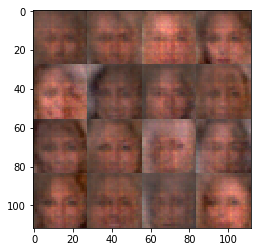

Epoch 1/1... Discriminator Loss: 1.4202 Generator Loss: 0.6150
Epoch 1/1... Discriminator Loss: 1.4087 Generator Loss: 0.6555
Epoch 1/1... Discriminator Loss: 1.4797 Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.5536 Generator Loss: 0.5928
Epoch 1/1... Discriminator Loss: 1.3669 Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 1.3666 Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.4828 Generator Loss: 0.6380
Epoch 1/1... Discriminator Loss: 1.3950 Generator Loss: 0.6394
Epoch 1/1... Discriminator Loss: 1.3906 Generator Loss: 0.6439
Epoch 1/1... Discriminator Loss: 1.3740 Generator Loss: 0.6779


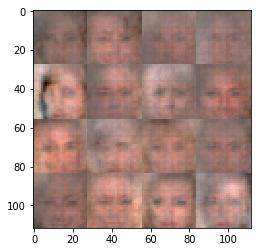

Epoch 1/1... Discriminator Loss: 1.2977 Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.5115 Generator Loss: 0.5850
Epoch 1/1... Discriminator Loss: 1.4369 Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.3779 Generator Loss: 0.6112
Epoch 1/1... Discriminator Loss: 1.5024 Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.2391 Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.3754 Generator Loss: 0.6212
Epoch 1/1... Discriminator Loss: 1.3655 Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.4223 Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.4056 Generator Loss: 0.6494


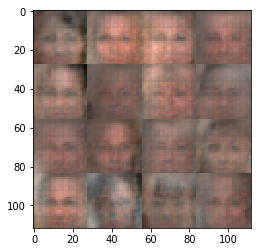

Epoch 1/1... Discriminator Loss: 1.4043 Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.4008 Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.4590 Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.3311 Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.4157 Generator Loss: 0.6111
Epoch 1/1... Discriminator Loss: 1.4894 Generator Loss: 0.6078
Epoch 1/1... Discriminator Loss: 1.4050 Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.4395 Generator Loss: 0.5847
Epoch 1/1... Discriminator Loss: 1.4409 Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.4401 Generator Loss: 0.6178


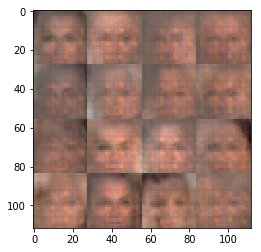

Epoch 1/1... Discriminator Loss: 1.3773 Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.3980 Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 1.3757 Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 1.3747 Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.3489 Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.4174 Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.3408 Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.3828 Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.5772 Generator Loss: 0.5624
Epoch 1/1... Discriminator Loss: 1.4323 Generator Loss: 0.5872


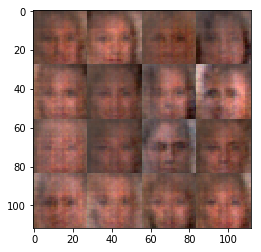

Epoch 1/1... Discriminator Loss: 1.3059 Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 1.5666 Generator Loss: 0.6047
Epoch 1/1... Discriminator Loss: 1.3749 Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.4645 Generator Loss: 0.6264
Epoch 1/1... Discriminator Loss: 1.4522 Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.4267 Generator Loss: 0.6795
Epoch 1/1... Discriminator Loss: 1.5221 Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.3892 Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.3708 Generator Loss: 0.6101
Epoch 1/1... Discriminator Loss: 1.5419 Generator Loss: 0.5825


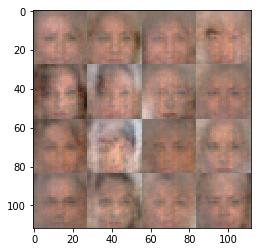

Epoch 1/1... Discriminator Loss: 1.3647 Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 1.4526 Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 1.3736 Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.3788 Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.4282 Generator Loss: 0.6097
Epoch 1/1... Discriminator Loss: 1.3943 Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.5227 Generator Loss: 0.5739
Epoch 1/1... Discriminator Loss: 1.4904 Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.4365 Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 1.4994 Generator Loss: 0.5862


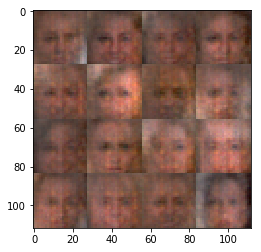

Epoch 1/1... Discriminator Loss: 1.2997 Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.5429 Generator Loss: 0.5966
Epoch 1/1... Discriminator Loss: 1.4123 Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.4032 Generator Loss: 0.6374
Epoch 1/1... Discriminator Loss: 1.4614 Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 1.4814 Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.3265 Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.5447 Generator Loss: 0.6011
Epoch 1/1... Discriminator Loss: 1.3118 Generator Loss: 0.7181
Epoch 1/1... Discriminator Loss: 1.3971 Generator Loss: 0.6687


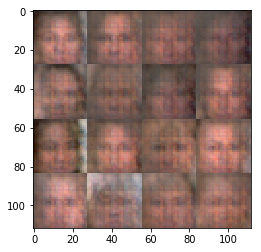

Epoch 1/1... Discriminator Loss: 1.6795 Generator Loss: 0.5557
Epoch 1/1... Discriminator Loss: 1.2317 Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.3361 Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3984 Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.3970 Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.4922 Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.4223 Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.4627 Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 1.3303 Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.4110 Generator Loss: 0.7038


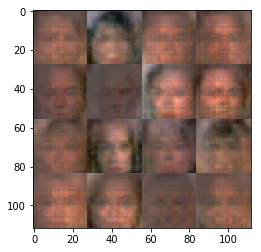

Epoch 1/1... Discriminator Loss: 1.4524 Generator Loss: 0.5575
Epoch 1/1... Discriminator Loss: 1.4264 Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.4036 Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 1.3883 Generator Loss: 0.6579
Epoch 1/1... Discriminator Loss: 1.4412 Generator Loss: 0.6562
Epoch 1/1... Discriminator Loss: 1.3773 Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.4024 Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.2675 Generator Loss: 0.6989
Epoch 1/1... Discriminator Loss: 1.5039 Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 1.3621 Generator Loss: 0.6256


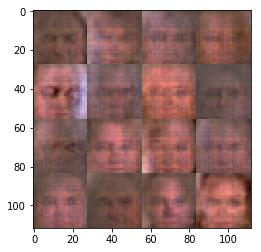

Epoch 1/1... Discriminator Loss: 1.4786 Generator Loss: 0.5838
Epoch 1/1... Discriminator Loss: 1.3998 Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.3948 Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.4177 Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.3739 Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.2977 Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.3870 Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.4393 Generator Loss: 0.6670
Epoch 1/1... Discriminator Loss: 1.4027 Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.4337 Generator Loss: 0.6379


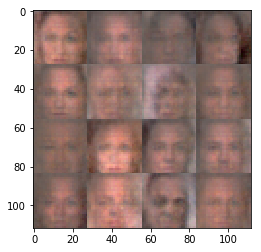

Epoch 1/1... Discriminator Loss: 1.4805 Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 1.4352 Generator Loss: 0.6212
Epoch 1/1... Discriminator Loss: 1.4007 Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.3803 Generator Loss: 0.6737
Epoch 1/1... Discriminator Loss: 1.3795 Generator Loss: 0.7084
Epoch 1/1... Discriminator Loss: 1.4364 Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.4077 Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.3706 Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.4660 Generator Loss: 0.6388
Epoch 1/1... Discriminator Loss: 1.4067 Generator Loss: 0.6813


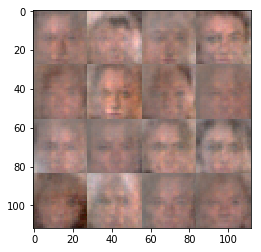

Epoch 1/1... Discriminator Loss: 1.3408 Generator Loss: 0.7082
Epoch 1/1... Discriminator Loss: 1.4318 Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.5724 Generator Loss: 0.6030
Epoch 1/1... Discriminator Loss: 1.3932 Generator Loss: 0.6677
Epoch 1/1... Discriminator Loss: 1.4160 Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 1.4590 Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.4574 Generator Loss: 0.6408
Epoch 1/1... Discriminator Loss: 1.4860 Generator Loss: 0.6027
Epoch 1/1... Discriminator Loss: 1.2527 Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.4669 Generator Loss: 0.6523


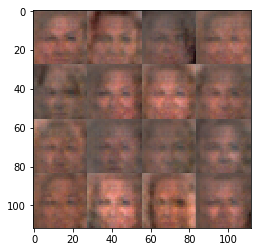

Epoch 1/1... Discriminator Loss: 1.3584 Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.3368 Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.4736 Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.4281 Generator Loss: 0.6272
Epoch 1/1... Discriminator Loss: 1.2314 Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.4642 Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.4054 Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 1.5832 Generator Loss: 0.5846
Epoch 1/1... Discriminator Loss: 1.2860 Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.4756 Generator Loss: 0.6472


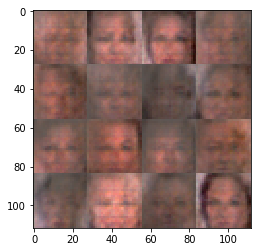

Epoch 1/1... Discriminator Loss: 1.3912 Generator Loss: 0.6979
Epoch 1/1... Discriminator Loss: 1.4387 Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.4331 Generator Loss: 0.6436
Epoch 1/1... Discriminator Loss: 1.4590 Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.3818 Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.4576 Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.3348 Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.3578 Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.4716 Generator Loss: 0.5970
Epoch 1/1... Discriminator Loss: 1.4138 Generator Loss: 0.6462


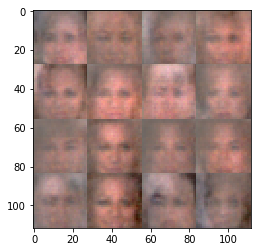

Epoch 1/1... Discriminator Loss: 1.4242 Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.4231 Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.4306 Generator Loss: 0.6153
Epoch 1/1... Discriminator Loss: 1.4470 Generator Loss: 0.6468
Epoch 1/1... Discriminator Loss: 1.3357 Generator Loss: 0.7503
Epoch 1/1... Discriminator Loss: 1.3547 Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.3624 Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.4709 Generator Loss: 0.6110
Epoch 1/1... Discriminator Loss: 1.4286 Generator Loss: 0.6458
Epoch 1/1... Discriminator Loss: 1.3755 Generator Loss: 0.6796


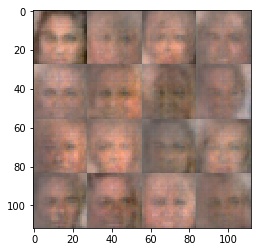

Epoch 1/1... Discriminator Loss: 1.4854 Generator Loss: 0.5715
Epoch 1/1... Discriminator Loss: 1.4019 Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.4299 Generator Loss: 0.6279
Epoch 1/1... Discriminator Loss: 1.5016 Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 1.3963 Generator Loss: 0.6388
Epoch 1/1... Discriminator Loss: 1.3858 Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.4595 Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.4455 Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.4509 Generator Loss: 0.6622
Epoch 1/1... Discriminator Loss: 1.3997 Generator Loss: 0.6445


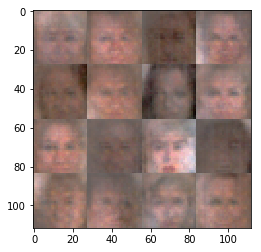

Epoch 1/1... Discriminator Loss: 1.3635 Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.4336 Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.3814 Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.4079 Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.4374 Generator Loss: 0.6529
Epoch 1/1... Discriminator Loss: 1.4238 Generator Loss: 0.7525
Epoch 1/1... Discriminator Loss: 1.2228 Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.5667 Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 1.4998 Generator Loss: 0.6327
Epoch 1/1... Discriminator Loss: 1.4672 Generator Loss: 0.6266


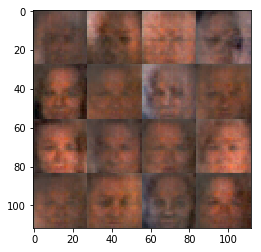

Epoch 1/1... Discriminator Loss: 1.3989 Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.4240 Generator Loss: 0.6327
Epoch 1/1... Discriminator Loss: 1.4696 Generator Loss: 0.6090
Epoch 1/1... Discriminator Loss: 1.4017 Generator Loss: 0.6223
Epoch 1/1... Discriminator Loss: 1.3798 Generator Loss: 0.6779
Epoch 1/1... Discriminator Loss: 1.3244 Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.4436 Generator Loss: 0.6603
Epoch 1/1... Discriminator Loss: 1.4330 Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 1.5737 Generator Loss: 0.5711
Epoch 1/1... Discriminator Loss: 1.4280 Generator Loss: 0.6843


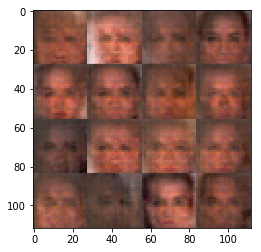

Epoch 1/1... Discriminator Loss: 1.2734 Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.4109 Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.4373 Generator Loss: 0.7018
Epoch 1/1... Discriminator Loss: 1.6043 Generator Loss: 0.5962
Epoch 1/1... Discriminator Loss: 1.4308 Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.3879 Generator Loss: 0.5905
Epoch 1/1... Discriminator Loss: 1.4553 Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.3024 Generator Loss: 0.7187
Epoch 1/1... Discriminator Loss: 1.4198 Generator Loss: 0.6532
Epoch 1/1... Discriminator Loss: 1.5457 Generator Loss: 0.5705


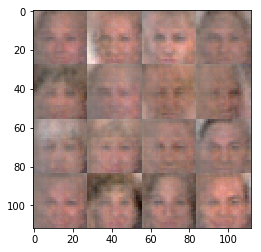

Epoch 1/1... Discriminator Loss: 1.3178 Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.5355 Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.3657 Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.4427 Generator Loss: 0.6610
Epoch 1/1... Discriminator Loss: 1.4571 Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4620 Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.2492 Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.4347 Generator Loss: 0.6428
Epoch 1/1... Discriminator Loss: 1.2746 Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 1.3876 Generator Loss: 0.6930


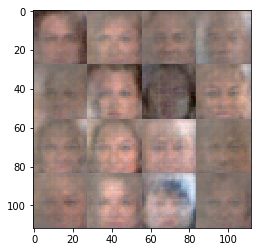

Epoch 1/1... Discriminator Loss: 1.3986 Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.3310 Generator Loss: 0.6630
Epoch 1/1... Discriminator Loss: 1.3992 Generator Loss: 0.7039
Epoch 1/1... Discriminator Loss: 1.4455 Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.3783 Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.3998 Generator Loss: 0.6961
Epoch 1/1... Discriminator Loss: 1.4002 Generator Loss: 0.6404
Epoch 1/1... Discriminator Loss: 1.4229 Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.3909 Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.4492 Generator Loss: 0.6373


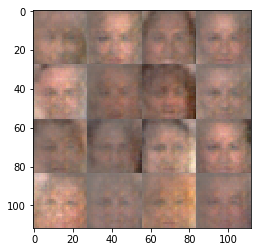

Epoch 1/1... Discriminator Loss: 1.3588 Generator Loss: 0.7407
Epoch 1/1... Discriminator Loss: 1.4606 Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.4349 Generator Loss: 0.7013
Epoch 1/1... Discriminator Loss: 1.4074 Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.4315 Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.4017 Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.3927 Generator Loss: 0.6770
Epoch 1/1... Discriminator Loss: 1.4519 Generator Loss: 0.6304
Epoch 1/1... Discriminator Loss: 1.4331 Generator Loss: 0.6404
Epoch 1/1... Discriminator Loss: 1.3704 Generator Loss: 0.6825


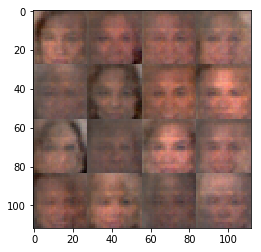

Epoch 1/1... Discriminator Loss: 1.3727 Generator Loss: 0.6622
Epoch 1/1... Discriminator Loss: 1.5642 Generator Loss: 0.5429
Epoch 1/1... Discriminator Loss: 1.4846 Generator Loss: 0.6319
Epoch 1/1... Discriminator Loss: 1.2937 Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.4371 Generator Loss: 0.5930
Epoch 1/1... Discriminator Loss: 1.3844 Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.3391 Generator Loss: 0.6708
Epoch 1/1... Discriminator Loss: 1.4794 Generator Loss: 0.6387
Epoch 1/1... Discriminator Loss: 1.3339 Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.3810 Generator Loss: 0.6266


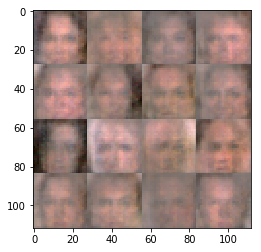

Epoch 1/1... Discriminator Loss: 1.4184 Generator Loss: 0.6272
Epoch 1/1... Discriminator Loss: 1.3495 Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.4228 Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.3363 Generator Loss: 0.7000
Epoch 1/1... Discriminator Loss: 1.2611 Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 1.4991 Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.4294 Generator Loss: 0.6549
Epoch 1/1... Discriminator Loss: 1.3598 Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.3227 Generator Loss: 0.7346
Epoch 1/1... Discriminator Loss: 1.4874 Generator Loss: 0.6207


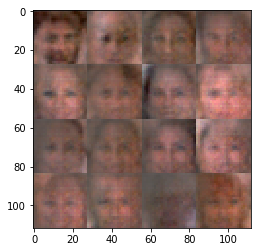

Epoch 1/1... Discriminator Loss: 1.2678 Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.4675 Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 1.4520 Generator Loss: 0.5916
Epoch 1/1... Discriminator Loss: 1.4606 Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.3316 Generator Loss: 0.6277
Epoch 1/1... Discriminator Loss: 1.3267 Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.3748 Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.4683 Generator Loss: 0.5935
Epoch 1/1... Discriminator Loss: 1.3850 Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.3947 Generator Loss: 0.6160


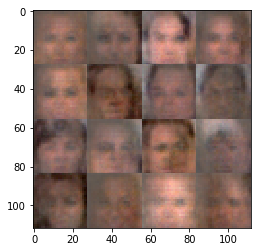

Epoch 1/1... Discriminator Loss: 1.4656 Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.3798 Generator Loss: 0.7200
Epoch 1/1... Discriminator Loss: 1.4466 Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.3630 Generator Loss: 0.6954
Epoch 1/1... Discriminator Loss: 1.3949 Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.3584 Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.4172 Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.4346 Generator Loss: 0.6295
Epoch 1/1... Discriminator Loss: 1.3697 Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 1.6375 Generator Loss: 0.5395


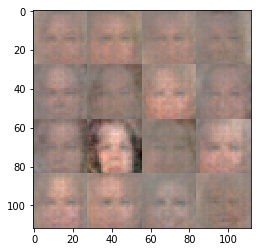

Epoch 1/1... Discriminator Loss: 1.3342 Generator Loss: 0.7242
Epoch 1/1... Discriminator Loss: 1.1819 Generator Loss: 0.7172
Epoch 1/1... Discriminator Loss: 1.4566 Generator Loss: 0.6428
Epoch 1/1... Discriminator Loss: 1.3622 Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.2113 Generator Loss: 0.7802
Epoch 1/1... Discriminator Loss: 1.4538 Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.3919 Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.3832 Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 1.3996 Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.3472 Generator Loss: 0.7131


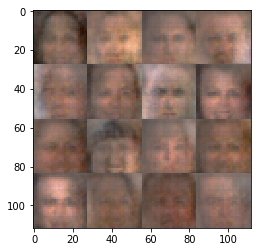

Epoch 1/1... Discriminator Loss: 1.3594 Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.4111 Generator Loss: 0.6064
Epoch 1/1... Discriminator Loss: 1.4932 Generator Loss: 0.5961
Epoch 1/1... Discriminator Loss: 1.3878 Generator Loss: 0.6430
Epoch 1/1... Discriminator Loss: 1.3778 Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.4473 Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 1.4146 Generator Loss: 0.5959
Epoch 1/1... Discriminator Loss: 1.3812 Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.3751 Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.3414 Generator Loss: 0.6908


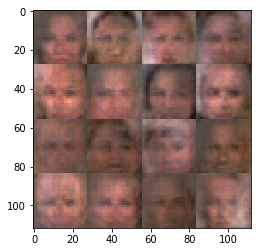

Epoch 1/1... Discriminator Loss: 1.4033 Generator Loss: 0.6416
Epoch 1/1... Discriminator Loss: 1.4028 Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.4410 Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.4216 Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.3933 Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.4152 Generator Loss: 0.6395
Epoch 1/1... Discriminator Loss: 1.4174 Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.4239 Generator Loss: 0.6195
Epoch 1/1... Discriminator Loss: 1.4353 Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.3613 Generator Loss: 0.7029


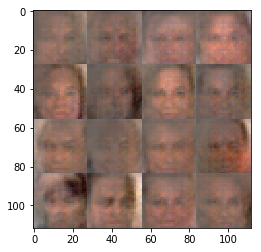

Epoch 1/1... Discriminator Loss: 1.3158 Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.4122 Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.4393 Generator Loss: 0.5854
Epoch 1/1... Discriminator Loss: 1.5184 Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.4940 Generator Loss: 0.5933
Epoch 1/1... Discriminator Loss: 1.4776 Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.4134 Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.4656 Generator Loss: 0.6177
Epoch 1/1... Discriminator Loss: 1.4039 Generator Loss: 0.6710
Epoch 1/1... Discriminator Loss: 1.3663 Generator Loss: 0.6792


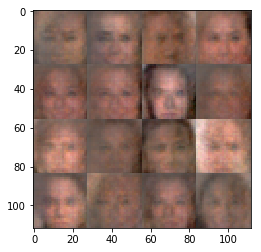

Epoch 1/1... Discriminator Loss: 1.4656 Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.3692 Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.2340 Generator Loss: 0.7284
Epoch 1/1... Discriminator Loss: 1.3589 Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.3816 Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.4319 Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.4496 Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.3814 Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.4469 Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.4752 Generator Loss: 0.5606


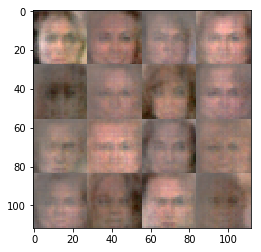

Epoch 1/1... Discriminator Loss: 1.0520 Generator Loss: 0.8270
Epoch 1/1... Discriminator Loss: 1.4715 Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.4289 Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.3579 Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.3745 Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.3868 Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.4141 Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.4218 Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 1.4142 Generator Loss: 0.6637
Epoch 1/1... Discriminator Loss: 1.4155 Generator Loss: 0.5966


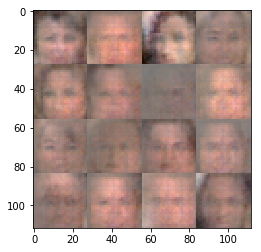

Epoch 1/1... Discriminator Loss: 1.3753 Generator Loss: 0.6958
Epoch 1/1... Discriminator Loss: 1.4291 Generator Loss: 0.6443
Epoch 1/1... Discriminator Loss: 1.3915 Generator Loss: 0.6465
Epoch 1/1... Discriminator Loss: 1.3372 Generator Loss: 0.7240
Epoch 1/1... Discriminator Loss: 1.4568 Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.4689 Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 1.4227 Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.4005 Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 1.3182 Generator Loss: 0.7059
Epoch 1/1... Discriminator Loss: 1.4623 Generator Loss: 0.6319


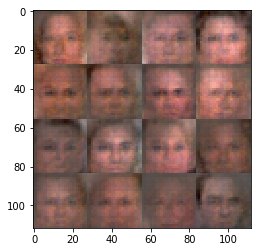

Epoch 1/1... Discriminator Loss: 1.3446 Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 1.4718 Generator Loss: 0.6258
Epoch 1/1... Discriminator Loss: 1.4423 Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.3437 Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.4644 Generator Loss: 0.6375
Epoch 1/1... Discriminator Loss: 1.3411 Generator Loss: 0.7062
Epoch 1/1... Discriminator Loss: 1.3497 Generator Loss: 0.7218
Epoch 1/1... Discriminator Loss: 1.3976 Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.3506 Generator Loss: 0.7064
Epoch 1/1... Discriminator Loss: 1.4109 Generator Loss: 0.6739


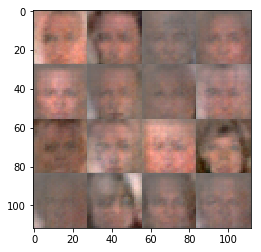

Epoch 1/1... Discriminator Loss: 1.5326 Generator Loss: 0.5900
Epoch 1/1... Discriminator Loss: 1.3158 Generator Loss: 0.7335
Epoch 1/1... Discriminator Loss: 1.3436 Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.5066 Generator Loss: 0.6355
Epoch 1/1... Discriminator Loss: 1.4032 Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.3957 Generator Loss: 0.6489
Epoch 1/1... Discriminator Loss: 1.5481 Generator Loss: 0.6094
Epoch 1/1... Discriminator Loss: 1.3728 Generator Loss: 0.7123
Epoch 1/1... Discriminator Loss: 1.3244 Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.4468 Generator Loss: 0.6539


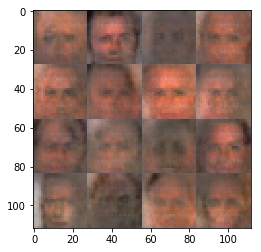

Epoch 1/1... Discriminator Loss: 1.4233 Generator Loss: 0.6148
Epoch 1/1... Discriminator Loss: 1.3656 Generator Loss: 0.6383
Epoch 1/1... Discriminator Loss: 1.5490 Generator Loss: 0.5537
Epoch 1/1... Discriminator Loss: 1.4512 Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.4093 Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 1.4729 Generator Loss: 0.6247
Epoch 1/1... Discriminator Loss: 1.3876 Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.4309 Generator Loss: 0.6753
Epoch 1/1... Discriminator Loss: 1.2990 Generator Loss: 0.7529
Epoch 1/1... Discriminator Loss: 1.4842 Generator Loss: 0.6321


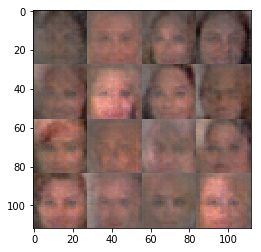

Epoch 1/1... Discriminator Loss: 1.3537 Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.5001 Generator Loss: 0.6127
Epoch 1/1... Discriminator Loss: 1.3257 Generator Loss: 0.6770
Epoch 1/1... Discriminator Loss: 1.3311 Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 1.3802 Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.4085 Generator Loss: 0.6325
Epoch 1/1... Discriminator Loss: 1.4191 Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 1.3627 Generator Loss: 0.6970
Epoch 1/1... Discriminator Loss: 1.3910 Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.4465 Generator Loss: 0.6734


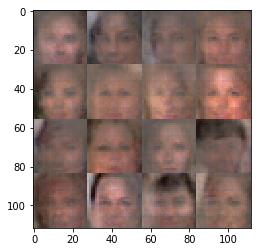

Epoch 1/1... Discriminator Loss: 1.4106 Generator Loss: 0.6232
Epoch 1/1... Discriminator Loss: 1.4845 Generator Loss: 0.6681
Epoch 1/1... Discriminator Loss: 1.3951 Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.3184 Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.4269 Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 1.4354 Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.3966 Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.4105 Generator Loss: 0.6251
Epoch 1/1... Discriminator Loss: 1.5085 Generator Loss: 0.5591
Epoch 1/1... Discriminator Loss: 1.4038 Generator Loss: 0.6197


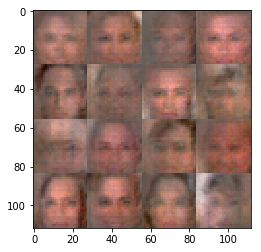

Epoch 1/1... Discriminator Loss: 1.3837 Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.5303 Generator Loss: 0.5847
Epoch 1/1... Discriminator Loss: 1.3806 Generator Loss: 0.6944
Epoch 1/1... Discriminator Loss: 1.3947 Generator Loss: 0.6378
Epoch 1/1... Discriminator Loss: 1.3395 Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.4350 Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.3710 Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.4896 Generator Loss: 0.6133
Epoch 1/1... Discriminator Loss: 1.3897 Generator Loss: 0.6545
Epoch 1/1... Discriminator Loss: 1.3582 Generator Loss: 0.7129


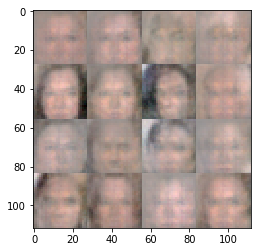

Epoch 1/1... Discriminator Loss: 1.4020 Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 1.4823 Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.4112 Generator Loss: 0.6803
Epoch 1/1... Discriminator Loss: 1.4700 Generator Loss: 0.6313
Epoch 1/1... Discriminator Loss: 1.4002 Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.4028 Generator Loss: 0.6488
Epoch 1/1... Discriminator Loss: 1.6351 Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.3864 Generator Loss: 0.6790
Epoch 1/1... Discriminator Loss: 1.5248 Generator Loss: 0.5716
Epoch 1/1... Discriminator Loss: 1.3565 Generator Loss: 0.7197


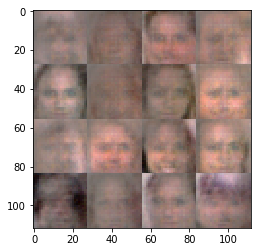

Epoch 1/1... Discriminator Loss: 1.3825 Generator Loss: 0.6670
Epoch 1/1... Discriminator Loss: 1.3675 Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.4482 Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.3471 Generator Loss: 0.6604
Epoch 1/1... Discriminator Loss: 1.4887 Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.3573 Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.4093 Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.4758 Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.3981 Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.3840 Generator Loss: 0.7409


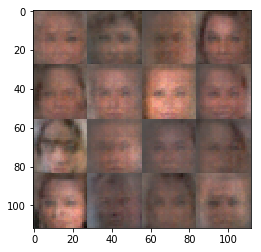

Epoch 1/1... Discriminator Loss: 1.4208 Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.4432 Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.4400 Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.4093 Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.3744 Generator Loss: 0.6612
Epoch 1/1... Discriminator Loss: 1.4382 Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.3804 Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.3987 Generator Loss: 0.6469
Epoch 1/1... Discriminator Loss: 1.4262 Generator Loss: 0.6172
Epoch 1/1... Discriminator Loss: 1.3530 Generator Loss: 0.6347


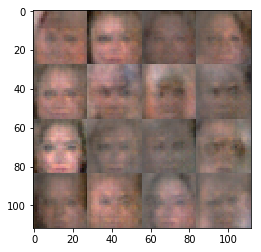

Epoch 1/1... Discriminator Loss: 1.4051 Generator Loss: 0.6466
Epoch 1/1... Discriminator Loss: 1.4272 Generator Loss: 0.6131
Epoch 1/1... Discriminator Loss: 1.3501 Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 1.3867 Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 1.3948 Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.3757 Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.3480 Generator Loss: 0.6501
Epoch 1/1... Discriminator Loss: 1.4473 Generator Loss: 0.6478
Epoch 1/1... Discriminator Loss: 1.2613 Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.4133 Generator Loss: 0.7358


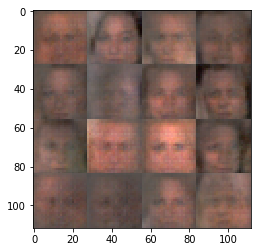

Epoch 1/1... Discriminator Loss: 1.4729 Generator Loss: 0.6246
Epoch 1/1... Discriminator Loss: 1.5003 Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.4170 Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.4686 Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.4731 Generator Loss: 0.6090
Epoch 1/1... Discriminator Loss: 1.3160 Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.6159 Generator Loss: 0.5339
Epoch 1/1... Discriminator Loss: 1.4082 Generator Loss: 0.6604
Epoch 1/1... Discriminator Loss: 1.5046 Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 1.5241 Generator Loss: 0.6397


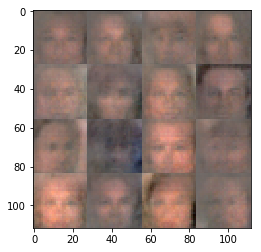

Epoch 1/1... Discriminator Loss: 1.3901 Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.4644 Generator Loss: 0.6618
Epoch 1/1... Discriminator Loss: 1.3847 Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.3498 Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.4793 Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 1.4178 Generator Loss: 0.6228
Epoch 1/1... Discriminator Loss: 1.4386 Generator Loss: 0.6297


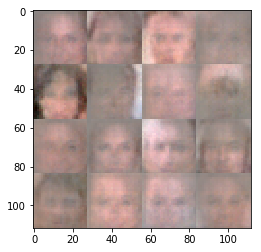

Epoch 1/1... Discriminator Loss: 1.4499 Generator Loss: 0.7272
Epoch 1/1... Discriminator Loss: 1.4253 Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.4093 Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.3513 Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.3561 Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 1.4154 Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.3666 Generator Loss: 0.6201
Epoch 1/1... Discriminator Loss: 1.4111 Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 1.4313 Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.4404 Generator Loss: 0.6331


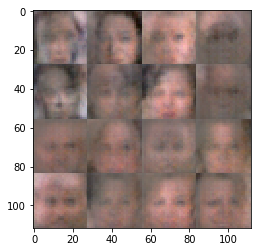

Epoch 1/1... Discriminator Loss: 1.4235 Generator Loss: 0.6183
Epoch 1/1... Discriminator Loss: 1.4277 Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3005 Generator Loss: 0.7565
Epoch 1/1... Discriminator Loss: 1.4739 Generator Loss: 0.6266
Epoch 1/1... Discriminator Loss: 1.3931 Generator Loss: 0.6963
Epoch 1/1... Discriminator Loss: 1.3744 Generator Loss: 0.6331
Epoch 1/1... Discriminator Loss: 1.4213 Generator Loss: 0.6721
Epoch 1/1... Discriminator Loss: 1.4113 Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.3124 Generator Loss: 0.7186
Epoch 1/1... Discriminator Loss: 1.4101 Generator Loss: 0.6593


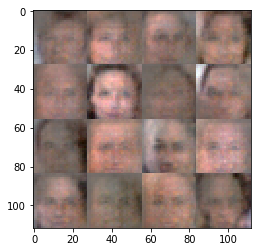

Epoch 1/1... Discriminator Loss: 1.3511 Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.4242 Generator Loss: 0.6248
Epoch 1/1... Discriminator Loss: 1.4053 Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.3856 Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.4036 Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3918 Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.4244 Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.4223 Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.3874 Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.3923 Generator Loss: 0.6673


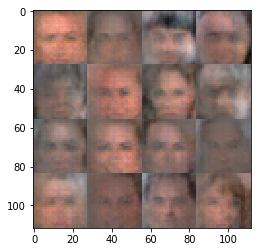

Epoch 1/1... Discriminator Loss: 1.4235 Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.4599 Generator Loss: 0.6009
Epoch 1/1... Discriminator Loss: 1.3838 Generator Loss: 0.6981
Epoch 1/1... Discriminator Loss: 1.4329 Generator Loss: 0.5949
Epoch 1/1... Discriminator Loss: 1.3597 Generator Loss: 0.7362
Epoch 1/1... Discriminator Loss: 1.4517 Generator Loss: 0.6078
Epoch 1/1... Discriminator Loss: 1.4108 Generator Loss: 0.6245
Epoch 1/1... Discriminator Loss: 1.3889 Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.4034 Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.3744 Generator Loss: 0.7156


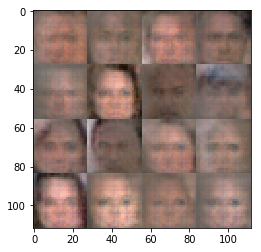

Epoch 1/1... Discriminator Loss: 1.4767 Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.3414 Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.4807 Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.4091 Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.4288 Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.4684 Generator Loss: 0.5797
Epoch 1/1... Discriminator Loss: 1.4117 Generator Loss: 0.7074
Epoch 1/1... Discriminator Loss: 1.4583 Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.4110 Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.4107 Generator Loss: 0.6498


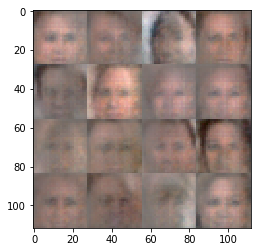

Epoch 1/1... Discriminator Loss: 1.4805 Generator Loss: 0.6363
Epoch 1/1... Discriminator Loss: 1.4556 Generator Loss: 0.6447
Epoch 1/1... Discriminator Loss: 1.4604 Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.4046 Generator Loss: 0.6768
Epoch 1/1... Discriminator Loss: 1.4462 Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.4035 Generator Loss: 0.6944
Epoch 1/1... Discriminator Loss: 1.4559 Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.3656 Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 1.4093 Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.3349 Generator Loss: 0.7267


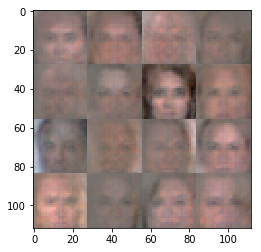

Epoch 1/1... Discriminator Loss: 1.3967 Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.4468 Generator Loss: 0.6231
Epoch 1/1... Discriminator Loss: 1.3141 Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.3954 Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.4232 Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 1.3481 Generator Loss: 0.7233
Epoch 1/1... Discriminator Loss: 1.4074 Generator Loss: 0.7164
Epoch 1/1... Discriminator Loss: 1.3972 Generator Loss: 0.6152
Epoch 1/1... Discriminator Loss: 1.4086 Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.3973 Generator Loss: 0.6739


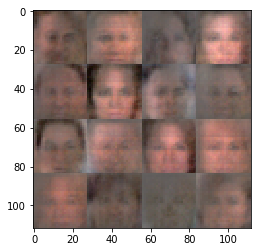

Epoch 1/1... Discriminator Loss: 1.4192 Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.3847 Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.3714 Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.4689 Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.4542 Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.4428 Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.5128 Generator Loss: 0.5659
Epoch 1/1... Discriminator Loss: 1.4530 Generator Loss: 0.6172
Epoch 1/1... Discriminator Loss: 1.3768 Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.5827 Generator Loss: 0.5694


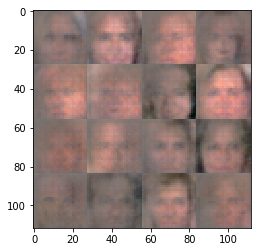

Epoch 1/1... Discriminator Loss: 1.4258 Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.3755 Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.3712 Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.4112 Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.2415 Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 1.4145 Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.4501 Generator Loss: 0.6376
Epoch 1/1... Discriminator Loss: 1.3839 Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.3115 Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 1.4526 Generator Loss: 0.6595


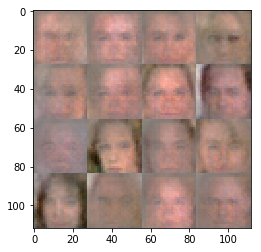

Epoch 1/1... Discriminator Loss: 1.4363 Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.3705 Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.4993 Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.4141 Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.4938 Generator Loss: 0.6604
Epoch 1/1... Discriminator Loss: 1.4363 Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.4052 Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 1.3534 Generator Loss: 0.6883
Epoch 1/1... Discriminator Loss: 1.3233 Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 1.4006 Generator Loss: 0.6480


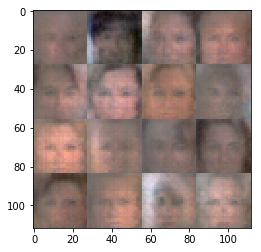

Epoch 1/1... Discriminator Loss: 1.3912 Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.4352 Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 1.4765 Generator Loss: 0.5995
Epoch 1/1... Discriminator Loss: 1.4113 Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.3659 Generator Loss: 0.7524
Epoch 1/1... Discriminator Loss: 1.3252 Generator Loss: 0.7230
Epoch 1/1... Discriminator Loss: 1.4166 Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.3550 Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.4439 Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.3957 Generator Loss: 0.7290


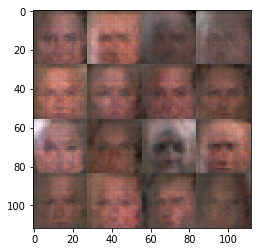

Epoch 1/1... Discriminator Loss: 1.3601 Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.4184 Generator Loss: 0.6475
Epoch 1/1... Discriminator Loss: 1.3527 Generator Loss: 0.6627
Epoch 1/1... Discriminator Loss: 1.3948 Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.3856 Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.4114 Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.3519 Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.3928 Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.4162 Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.4215 Generator Loss: 0.7087


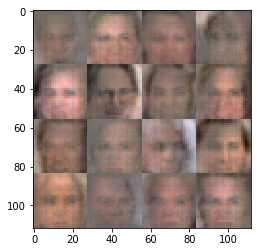

Epoch 1/1... Discriminator Loss: 1.4096 Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.3894 Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.3806 Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.3997 Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.3578 Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.4187 Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.3861 Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.4000 Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.3851 Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.4070 Generator Loss: 0.6647


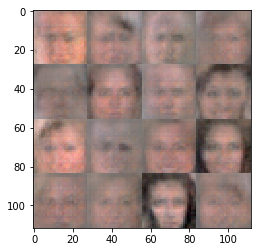

Epoch 1/1... Discriminator Loss: 1.2811 Generator Loss: 0.7704
Epoch 1/1... Discriminator Loss: 1.4703 Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.4605 Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.3115 Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.4770 Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.3866 Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 1.4543 Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.4087 Generator Loss: 0.6739
Epoch 1/1... Discriminator Loss: 1.4007 Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.4023 Generator Loss: 0.6423


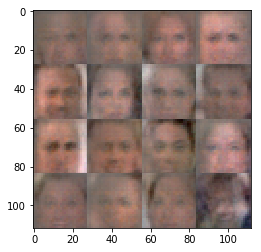

Epoch 1/1... Discriminator Loss: 1.4014 Generator Loss: 0.6568
Epoch 1/1... Discriminator Loss: 1.3625 Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 1.4162 Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.3212 Generator Loss: 0.7279
Epoch 1/1... Discriminator Loss: 1.4253 Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 1.4257 Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.4073 Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.3786 Generator Loss: 0.6817
Epoch 1/1... Discriminator Loss: 1.3103 Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.4864 Generator Loss: 0.6111


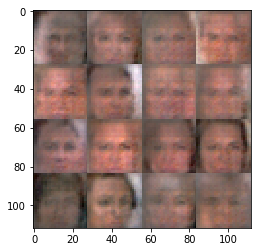

Epoch 1/1... Discriminator Loss: 1.4709 Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.4721 Generator Loss: 0.5826
Epoch 1/1... Discriminator Loss: 1.4370 Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.3317 Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 1.4444 Generator Loss: 0.6011
Epoch 1/1... Discriminator Loss: 1.4046 Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.3572 Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.5724 Generator Loss: 0.6047
Epoch 1/1... Discriminator Loss: 1.3759 Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.4149 Generator Loss: 0.6251


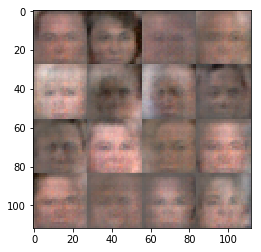

Epoch 1/1... Discriminator Loss: 1.4270 Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.3666 Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.4137 Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.3953 Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.4488 Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 1.3796 Generator Loss: 0.6156
End of Epoch...


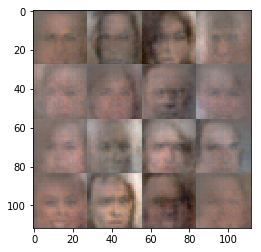

In [14]:
## First good attempt
#batch_size = 256
#z_dim = 100
#learning_rate = 0.0001
#beta1 = 0.75

## Attempt to improve -- better
#batch_size = 256
#z_dim = 100
#learning_rate = 0.0001
#beta1 = 0.5 or 0.2

## Attempt to improve
batch_size = 16
z_dim = 250
learning_rate = 0.0001
beta1 = 0.15


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

### Disclaimer
Code from previous projects was adapted to fit the required problem. Stack Overflow was also used to fix some bugs in the code.